Code to read ES Survey Data

Number of participants by region and language used.
The type of sample method used in the survey (simple, complex, etc.).
What is the survey representative of when you use the sample weights and when you don’t use the sample weights. This could be country, household, or individual.
The questions you would like to use in the thesis together with some descriptive statistics (for this you can omit considering the sample design and weights):
type of data: dichotomous; categorical (which categories); continuous (which range); open question (which language).
Correlation analysis

Data Reading and Preparation:

In [2]:
import pandas as pd
import numpy as np
import openpyxl
from bs4 import BeautifulSoup

In [3]:
survey_questions  = pd.read_csv('ESS_files\ESS10.csv', low_memory=False)
# Clean the survey questions dataframe to make it more usable for mapping
survey_questions

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,vinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,ESS10e03_2,10,3.2,02.11.2023,10038,BE,0.882220,0.972276,0.718075,0.698167,...,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,36.0,1,1.0,0.000397,188,2596
1,ESS10e03_2,10,3.2,02.11.2023,10053,BE,1.047643,0.888635,0.718075,0.638107,...,2022-04-08 11:07:00,2022-04-08 11:10:00,2022-04-08 11:07:00,2022-04-08 11:10:00,54.0,2,2.0,0.000334,194,2206
2,ESS10e03_2,10,3.2,02.11.2023,10055,BE,1.087741,0.722811,0.718075,0.519033,...,2022-05-20 11:08:00,2022-05-20 11:10:00,2022-05-20 11:08:00,2022-05-20 11:10:00,77.0,1,2.0,0.000322,198,2114
3,ESS10e03_2,10,3.2,02.11.2023,10062,BE,0.909910,1.005565,0.718075,0.722072,...,2022-05-22 13:58:00,2022-05-22 13:59:00,2022-05-22 13:58:00,2022-05-22 13:59:00,55.0,1,1.0,0.000385,150,2645
4,ESS10e03_2,10,3.2,02.11.2023,10064,BE,0.918949,0.638705,0.718075,0.458639,...,2022-05-18 11:44:00,2022-05-18 11:45:00,2022-05-18 11:44:00,2022-05-18 11:45:00,55.0,1,1.0,0.000381,149,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,ESS10e03_2,10,3.2,02.11.2023,27808,SK,0.515714,0.339385,0.323800,0.109893,...,2021-06-08 14:28:34,2021-06-08 14:30:41,2021-06-08 14:29:01,2021-06-08 14:31:44,70.0,1,1.0,0.001522,2610,27206
37607,ESS10e03_2,10,3.2,02.11.2023,27826,SK,0.297974,0.196093,0.323800,0.063495,...,2021-08-02 10:33:27,2021-08-02 10:36:27,2021-08-02 10:35:22,2021-08-02 10:37:34,45.0,1,2.0,0.002635,2610,27217
37608,ESS10e03_2,10,3.2,02.11.2023,27834,SK,0.965931,0.857000,0.323800,0.277497,...,2021-06-26 20:52:15,2021-06-26 20:53:05,2021-06-26 20:52:27,2021-06-26 20:54:32,33.0,1,1.0,0.000813,2631,27134
37609,ESS10e03_2,10,3.2,02.11.2023,27846,SK,0.854279,0.624287,0.323800,0.202144,...,2021-07-21 14:14:41,2021-07-21 14:17:31,2021-07-21 14:16:38,2021-07-21 14:18:38,43.0,1,1.0,0.000919,2638,27183


In [4]:
# Define the path to the HTML file
html_file_path = 'ESS_files/ESS10 codebook.html'

# Initialize a list to hold the rows of the DataFrame
rows = []

# Read the HTML file
with open(html_file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'lxml')

# Find all <h3> tags with an 'id' attribute (these contain the questions)
question_tags = soup.find_all('h3', id=True)

# Iterate over the question tags to extract the details
for tag in question_tags:
    idnumber = tag.get('id')  # Get the ID of the question
    questiontext = tag.find_next_sibling('div').text.strip()  # Get the question text
    
    # Find the next div that possibly contains the table
    table_container = tag.find_next_sibling('div').find_next_sibling('div')
    if table_container:
        table = table_container.find('table')
    else:
        table = None

    # Initialize an empty list to hold the response options
    responseoptions = []

    # If a table is found, extract options
    if table:
        for row in table.find_all('tr'):
            cells = row.find_all('td')
            if len(cells) == 2:  # Ensure exactly 2 cells are found (value and description)
                value = cells[0].text.strip()
                description = cells[1].text.strip()
                responseoptions.append(f"{value}: {description}")

    # Convert the list of response options to a string
    responseoptions_str = "; ".join(responseoptions)

    # Append the extracted information as a row to the rows list
    rows.append({
        'id': idnumber,
        'questiontext': questiontext,
        'responseoptions': responseoptions_str
    })

# Create a DataFrame from the rows list
ESSQuestionData = pd.DataFrame(rows)
ESSQuestionData["question_answers_combined"] = ESSQuestionData['questiontext'] + ESSQuestionData['responseoptions']
# Save the DataFrame to a CSV file
ESSQuestionData.to_csv("uncategorizedESSQuestionData.csv", index=False, sep=',')
ESSQuestionData
ESSQuestionData['ADICO_Category'] = ""
ESSQuestionData.set_index('id', inplace=True)
ESSQuestionData = ESSQuestionData.drop_duplicates()

ADICO Categorization of Questions

In [49]:
from typing import List, Optional
import json

from pydantic import BaseModel
from groq import Groq
# Now you can import the config module
from config import groqkey, OPENAI_Key
groq = Groq(api_key=groqkey)

import openai

# Make sure to set your OpenAI API key
openai.api_key = OPENAI_Key

In [55]:
test = ESSQuestionData['question_answers_combined'].sample(3)
testjson = test.to_json(orient='columns', index = True)

In [ ]:
def categorize_ADICO(request):
    chat_completion = openai.ChatCompletion.create(
        #
        # Required parameters
        #
        messages=[
            # Set an optional system message. This sets the behavior of the
            # assistant and can be used to provide specific instructions for
            # how it should behave throughout the conversation.
            {
                "role": "system",
                "content": "You are a helpful assistant that categorizes survey questions and presents them in JSON format (id:category).\nPossible categories are: \n Aim: Question to identify if responder has performed an action\n Condition: Question on factors that impact the responder's behavior\n Attribute: Only questions that directly ask for the responder's age, gender, location, or education. If it is not one of those it is a Condition.\n None"
            },
            # Set a user message for the assistant to respond to.
            {
                "role": "user",
                "content": f"Categorize the following JSON formatted id:question pairs: {request}",
            }
        ],

        # The language model which will generate the completion.
        model="gpt-3.5-turbo",

        #
        # Optional parameters
        #

        # Controls randomness: lowering results in less random completions.
        # As the temperature approaches zero, the model will become deterministic
        # and repetitive.
        temperature=0,

        # The maximum number of tokens to generate. Requests can use up to
        # 32,768 tokens shared between prompt and completion.
        max_tokens=1024,

        # Controls diversity via nucleus sampling: 0.5 means half of all
        # likelihood-weighted options are considered.
        top_p=1,

        # A stop sequence is a predefined or user-specified text string that
        # signals an AI to stop generating content, ensuring its responses
        # remain focused and concise. Examples include punctuation marks and
        # markers like "[end]".
        stop=None,

        # If set, partial message deltas will be sent.
        stream=False,
    )
    return chat_completion


completion = categorize_ADICO(testjson)
# Print the completion returned by the LLM.
response = completion.choices[0].message['content']
print(response)


In [80]:
def categorize_ADICO(request):
    chat_completion = create(
        #
        # Required parameters
        #
        messages=[
            # Set an optional system message. This sets the behavior of the
            # assistant and can be used to provide specific instructions for
            # how it should behave throughout the conversation.
            {
                "role": "system",
                "content": "You are a helpful assistant that categorises survey questions and presents them in json format (id:category) .\nPossible categories are: \n Aim: Question to identify if responder has performed an action\n Condition. Question on factors that impact the responder's behaviour \n Attribute: Only questions that directly ask for the responder's age, gender, location, or education. if it is not one of those it is a Condition. \n None"
            },
            # Set a user message for the assistant to respond to.
            {
                "role": "user",
                "content": f"Categorize the following json formatted id:question pairs: {request}",
            }
        ],

        # The language model which will generate the completion.
        model="gpt 3.5",

        #
        # Optional parameters
        #

        # Controls randomness: lowering results in less random completions.
        # As the temperature approaches zero, the model will become deterministic
        # and repetitive.
        temperature=0,

        # The maximum number of tokens to generate. Requests can use up to
        # 32,768 tokens shared between prompt and completion.
        max_tokens=1024,

        # Controls diversity via nucleus sampling: 0.5 means half of all
        # likelihood-weighted options are considered.
        top_p=1,

        # A stop sequence is a predefined or user-specified text string that
        # signals an AI to stop generating content, ensuring its responses
        # remain focused and concise. Examples include punctuation marks and
        # markers like "[end]".
        stop=None,

        # If set, partial message deltas will be sent.
        stream=False,
    )
    return chat_completion


completion = categorize_ADICO(testjson)
# Print the completion returned by the LLM.
response = completion.choices[0].message.content
print(response)

{
"sclmeet": "Aim",
"acchome": "None",
"testic42": "Condition"
}


In [169]:
while len(ESSQuestionData[ESSQuestionData['ADICO_Category'] == ""]) > 0:
    test = ESSQuestionData[ESSQuestionData['ADICO_Category'] == ""]['question_answers_combined'].sample(10)
    testjson = test.to_json(orient='columns', index = True)

    completion = categorize_ADICO(testjson)
    # Print the completion returned by the LLM.
    response = completion.choices[0].message.content

    try:
        # Parse the JSON string into a Python dictionary
        data_dict = json.loads(response)
    except:
        try:
            # Parse the JSON string into a Python dictionary
            data_dict = json.loads('['+response.split('[')[1].split(']')[0]+']')   
        except:
            data_dict = json.loads('{'+'}'.join('{'.join(response.split('{')[1:]).split('}')[:-1])+'}')
            

    # Convert the dictionary to a DataFrame
    # Since we have only one record, we wrap it in a list to make a single-row DataFrame
    IG_component_df = pd.DataFrame(data_dict.values(), index=data_dict.keys(), columns=['ADICO_Category'])

    display(IG_component_df)

    # Update ESSQuestionData with values from IG_component_df
    ESSQuestionData.update(IG_component_df)

,ADICO_Category
c19spo12,Condition
eiscedm,Attribute
emplrel,Attribute
gvjobc19,Aim
rlgdngb,Attribute
occf14b,Attribute
dscrage,Aim
edlvpegr,Attribute
hlthhmp,Aim
panresmo,Aim


AttributeError: 'list' object has no attribute 'values'

In [168]:
ESSQuestionData[ESSQuestionData['ADICO_Category'] != ""].sample(10)

,questiontext,responseoptions,question_answers_combined,ADICO_Category
id,,,,
panfolru,More important to follow government rules or t...,0: Much more important to follow government ru...,More important to follow government rules or t...,Aim
nwspol,"News about politics and current affairs, watch...",7777: Refusal*; 8888: Don't know*; 9999: No an...,"News about politics and current affairs, watch...",Aim
yrbrn,Year of birth,7777: Refusal*; 8888: Don't know*; 9999: No an...,Year of birth7777: Refusal*; 8888: Don't know*...,Attribute
jinws,Start of section J,,Start of section J,None
dngoth,Doing last 7 days: other,0: Not marked; 1: Marked,Doing last 7 days: other0: Not marked; 1: Marked,Condition
edlvdfi,"Highest level of education, Finland",1: Vähemmän kuin peruskoulun ala-aste tai vähe...,"Highest level of education, Finland1: Vähemmän...",Attribute
stfhlth,State of health services in country nowadays,0: Extremely bad; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5...,State of health services in country nowadays0:...,Condition
lvgptnea,"Ever lived with a partner, without being married",1: Yes; 2: No; 6: Not applicable*; 7: Refusal*...,"Ever lived with a partner, without being marri...",Aim
mcinter,Online/mobile communication makes work and per...,0: Not at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6...,Online/mobile communication makes work and per...,Condition


In [90]:
test = ESSQuestionData['question_answers_combined'].sample(3)
testjson = test.to_json(orient='columns', index = True)

try:
    # Parse the JSON string into a Python dictionary
    data_dict = json.loads(response)
except:
    # Parse the JSON string into a Python dictionary
    data_dict = json.loads('['+response.split('[')[1].split(']')[0]+']')        

# Convert the dictionary to a DataFrame
# Since we have only one record, we wrap it in a list to make a single-row DataFrame
IG_component_df = pd.DataFrame(data_dict.values(), index=data_dict.keys(), columns=['ADICO_Category'])

display(IG_component_df)

,ADICO_Category
sclmeet,Aim
acchome,None
testic42,Condition


,question_answers_combined,ADICO_Category
sclmeet,"How often socially meet with friends, relative...",Aim
acchome,Location able to access the internet: Home0: N...,None
testic42,"How likely, governments in enough countries ta...",Condition


In [47]:
# Data model for LLM to generate
class ADICO(BaseModel):
    id: str
    Category: str


def get_recipe(Questions_json) -> ADICO:
    chat_completion = groq.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a text categorizer that outputs categorises survey questions .\nPossible categories are:\nAttribute- Question to identify a demographic such as age or gender.\nAim - Question to identify if responder has performed a particular action\nCondition - Question to identify conditions that influence their actions\nNone"
                 
                # Pass the json schema to the model. Pretty printing improves results.
                f" The JSON object must use the schema: {json.dumps(ADICO.model_json_schema(), indent=2)}",
            },
            {
                "role": "user",
                "content": f"Categorise the following survey questions {Questions_json}",
            },
        ],
        model="llama3-8b-8192",
        temperature=0,
        # Streaming is not supported in JSON mode
        stream=False,
        # Enable JSON mode by setting the response format
        response_format={"type": "json_object"},
    )
    return ADICO.model_validate_json(chat_completion.choices[0].message.content)


def print_Adico(categories: ADICO):
    print("ID:", categories.id)

    print("\Category:")
    print(categories.Category)


categories = get_recipe(testjson)
print_Adico(categories)


BadRequestError: Error code: 400 - {'error': {'message': "Failed to generate JSON. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'json_validate_failed', 'failed_generation': '{\n    "id": "ipbhprp",\n    "Category": "Aim"\n  },\n  {\n    "id": "panclobo",\n    "Category": "Aim"\n  }'}}

In [38]:
categories

ADICO(id='1', Category='Aim')

Time to categorize questions using BERT!

In [7]:
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import Dataset
import torch
import pandas as pd

In [11]:
# Load the additional labeled examples provided for training the BERT model
training_data_path = 'adico_training_data.csv'
training_data = pd.read_csv(training_data_path).drop("Unnamed: 0", axis=1)

# Display the first few rows of the dataframe to understand its structure and labels
# training_data.head(), training_data.columns

training_data_resampled = pd.DataFrame(columns=training_data.columns)
for category in training_data['question_answers_combined'].unique():
    filtered_data = training_data[training_data['question_answers_combined'] == category]
    sample = filtered_data.sample(n=min(20, len(filtered_data)))
    
    training_data_resampled = pd.concat([training_data_resampled, sample])

In [12]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize and encode sequences in the DataFrame
def encode_data(df):
    return tokenizer(df['question_answers_combined'].tolist(), add_special_tokens=True, truncation=True, padding=True, max_length=512, return_tensors='pt')

# Encode the data
encoded_data = encode_data(training_data_resampled)

# Convert the dictionary of tensors into a list of dictionaries for each example
encoded_data = [{key: value[i] for key, value in encoded_data.items()} for i in range(encoded_data['input_ids'].shape[0])]

# Convert ADICO categories to numerical labels
labels_to_ids = {label: idx for idx, label in enumerate(training_data_resampled['ADICO_Category'].unique())}
ids_to_labels = {idx: label for label, idx in labels_to_ids.items()}
labels = training_data_resampled['ADICO_Category'].replace(labels_to_ids).values

# Split the data into training and validation sets
train_encodings, val_encodings, train_labels, val_labels = train_test_split(
    encoded_data, 
    labels, 
    test_size=0.1,
    random_state=42
)

# Prepare a PyTorch dataset
class ADICODataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels)

    def __getitem__(self, idx):
        item = {key: self.encodings[idx][key].clone().detach() for key in self.encodings[idx]}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)



# Create dataset instances
train_dataset = ADICODataset(train_encodings, train_labels)
val_dataset = ADICODataset(val_encodings, val_labels)

# # Check the dataset and encoding
# print(train_dataset[0], labels_to_ids)


In [77]:
# # Assuming the datasets are already created and the tokenizer is loaded
# # Load pre-trained BERT model for sequence classification with the correct number of labels
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(labels_to_ids))

# # Setup training arguments
# training_args = TrainingArguments(
#     output_dir='./results',          # directory to save output files
#     num_train_epochs=3,              # number of training epochs
#     per_device_train_batch_size=8,   # batch size for training
#     per_device_eval_batch_size=16,   # batch size for evaluation
#     warmup_steps=500,                # number of warmup steps for learning rate scheduler
#     weight_decay=0.01,               # strength of weight decay
#     logging_dir='./logs',            # directory for storing logs
#     logging_steps=10,
#     evaluation_strategy="epoch",     # evaluation is done at the end of each epoch
#     save_strategy="epoch"            # model checkpoint saving
# )

# # Initialize the Trainer
# trainer = Trainer(
#     model=model,                         # the instantiated 🤗 Transformers model to be trained
#     args=training_args,                  # training arguments, defined above
#     train_dataset=train_dataset,         # training dataset
#     eval_dataset=val_dataset             # evaluation dataset
# )

# # Train the model
# trainer.train()

# # You can save the final model and tokenizer for later use
# model_path = './bert-adico-classifier-resampled'
# model.save_pretrained(model_path)
# tokenizer.save_pretrained(model_path)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\coolg\AppData\Local\Programs\Python\Python311\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


  0%|          | 0/75 [00:00<?, ?it/s]

{'loss': 1.6338, 'grad_norm': 10.953563690185547, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.4}
{'loss': 1.5868, 'grad_norm': 10.28730297088623, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.8}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 1.5306823253631592, 'eval_runtime': 9.7806, 'eval_samples_per_second': 2.249, 'eval_steps_per_second': 0.204, 'epoch': 1.0}
{'loss': 1.4839, 'grad_norm': 9.176613807678223, 'learning_rate': 3e-06, 'epoch': 1.2}
{'loss': 1.3767, 'grad_norm': 7.73770809173584, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.6}
{'loss': 1.2704, 'grad_norm': 9.309700012207031, 'learning_rate': 5e-06, 'epoch': 2.0}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 1.2386239767074585, 'eval_runtime': 9.8383, 'eval_samples_per_second': 2.236, 'eval_steps_per_second': 0.203, 'epoch': 2.0}
{'loss': 1.0772, 'grad_norm': 7.889075756072998, 'learning_rate': 6e-06, 'epoch': 2.4}
{'loss': 1.011, 'grad_norm': 13.672643661499023, 'learning_rate': 7.000000000000001e-06, 'epoch': 2.8}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 1.0347317457199097, 'eval_runtime': 10.0065, 'eval_samples_per_second': 2.199, 'eval_steps_per_second': 0.2, 'epoch': 3.0}
{'train_runtime': 830.9148, 'train_samples_per_second': 0.715, 'train_steps_per_second': 0.09, 'train_loss': 1.3164060401916504, 'epoch': 3.0}


('./bert-adico-classifier-resampled\\tokenizer_config.json',
 './bert-adico-classifier-resampled\\special_tokens_map.json',
 './bert-adico-classifier-resampled\\vocab.txt',
 './bert-adico-classifier-resampled\\added_tokens.json')

In [8]:
# Load the saved model and tokenizer
model_path = './bert-adico-classifier-resampled' #condition heavy version: './bert-adico-classifier'
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Load the CSV file
data_path = 'ESSQuestionData.csv'  # Update this path accordingly
ESSQuestionData = pd.read_csv(data_path)
ESSQuestionData['ADICO_category'] = ""

def predict_adico_categories(texts):
    # Tokenize and prepare the data
    encoded_batch = tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt')
    
    # Move model to evaluation mode
    model.eval()
    model.to('cpu')  # Use CPU for inference

    # Make predictions
    with torch.no_grad():
        outputs = model(**encoded_batch)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=1)
    
    # Get the highest probability label for each text
    predicted_indices = torch.argmax(predictions, dim=1).numpy()
    predicted_labels = [ids_to_labels[idx] for idx in predicted_indices]
    return predicted_labels

In [13]:
# Assuming you want to process the DataFrame in batches of 20 rows
batch_size = 20

def get_labels(prediction_indices):
    return [ids_to_labels[idx] for idx in prediction_indices]



for i in range(0, 618, batch_size):
    # Define the end index of the batch, making sure not to go out of bounds
    end = i + batch_size if (i + batch_size) <= len(ESSQuestionData) else len(ESSQuestionData)

    # Select the batch
    batch_ESSQuestionData = ESSQuestionData.iloc[i:end]

    # Assuming 'texts' is a list of strings
    texts = batch_ESSQuestionData['question_answers_combined'].tolist()

    # Predict categories in batches
    predicted_labels = predict_adico_categories(texts)

    # Update DataFrame with new column for predicted categories
    ESSQuestionData.loc[i:end-1, 'ADICO_category'] = predicted_labels
    

In [93]:
training_data_resampled[training_data_resampled['ADICO_Category'] == 'Potential Shared Strategy '].at[37,'question_answers_combined']

'Please think back to when you were searching for a place to live. What were the principle factors that influenced your decisions in selecting a home?Natural hazards at a former place of residence No; Yes'

Maybe with Cohere it works better

In [16]:
import cohere
from cohere import ClassifyExample
import pandas as pd
import random
import json
from config import cohereKey
co = cohere.Client(cohereKey)

In [127]:
ESSQuestionData_path = 'ESSQuestionData.csv'  # Update this path accordingly

ESSQuestionData = pd.read_csv(ESSQuestionData_path)
ESSQuestionData

,id,questiontext,responseoptions,question_answers_combined
0,name,Title of dataset,NaN,Title of dataset
1,essround,ESS round,NaN,ESS round
2,edition,Edition,NaN,Edition
3,proddate,Production date,NaN,Production date
4,idno,Respondent's identification number,NaN,Respondent's identification number
...,...,...,...,...
613,mode,Mode of data collection,"1: Interview, Face to face (CAPI); 2: Intervie...","Mode of data collection1: Interview, Face to f..."
614,domain,Sampling domain,NaN,Sampling domain
615,prob,Sampling probability,NaN,Sampling probability
616,stratum,Sampling stratum,NaN,Sampling stratum


In [128]:
# Load the additional labeled examples provided for training the BERT model
training_data_path = 'adico_training_data.csv'
training_data = pd.read_csv(training_data_path).drop("Unnamed: 0", axis=1)

# Display the first few rows of the dataframe to understand its structure and labels
# training_data.head(), training_data.columns

training_data_resampled = pd.DataFrame(columns=training_data.columns)
for category in training_data['question_answers_combined'].unique():
    filtered_data = training_data[training_data['question_answers_combined'] == category]
    sample = filtered_data.sample(n=min(20, len(filtered_data)))
    
    training_data_resampled = pd.concat([training_data_resampled, sample])

In [129]:
print(training_data['ADICO_Category'].unique())
# Update rows where 'ADICO_Category' is 'Attribute' to 'Condition'
training_data.loc[training_data['ADICO_Category'].isin(["Attribute"]), 'ADICO_Category'] = "Condition"

# Update rows where 'ADICO_Category' is 'Attribute/Condition' to 'Condition'
training_data.loc[training_data['ADICO_Category'].isin(["Attribute/Condition"]), 'ADICO_Category'] = "Condition"

# Update rows where 'ADICO_Category' is 'Potential Shared Strategy ' to 'Condition'
training_data.loc[training_data['ADICO_Category'].isin(["Potential Shared Strategy "]), 'ADICO_Category'] = "Condition"

# Update rows where 'ADICO_Category' is 'Aim/Condition' to 'Aim'
training_data.loc[training_data['ADICO_Category'].isin(["Aim/Condition"]), 'ADICO_Category'] = "Aim"

['Attribute' 'Attribute/Condition' 'Condition' 'Aim/Condition'
 'Potential Shared Strategy ']


In [131]:
# Assuming survey_questions is your DataFrame
examples = []

for label in training_data['ADICO_Category'].unique():
    for index, row in training_data[training_data['ADICO_Category'] ==  label].sample(min(120,len(training_data[training_data['ADICO_Category'] ==  label]))).iterrows():
        text = row['question_answers_combined']
        examples.append(ClassifyExample(text=text, label=label))

In [133]:
response = co.classify(
    inputs=["text, hello", "other option"],
    examples=examples,
)
response

ClassifyResponse(id='4e0eabd5-ad24-4ba5-b73a-ff29891f1342', classifications=[ClassifyResponseClassificationsItem(id='1265e350-742a-4c09-a41c-eeb7f002d50e', input='text, hello', prediction='Condition', predictions=['Condition'], confidence=0.98777497, confidences=[0.98777497], labels={'Aim': ClassifyResponseClassificationsItemLabelsValue(confidence=0.012225044), 'Condition': ClassifyResponseClassificationsItemLabelsValue(confidence=0.98777497)}, classification_type='single-label'), ClassifyResponseClassificationsItem(id='a2aef3a7-07a4-4783-8b37-9b955b8f1065', input='other option', prediction='Condition', predictions=['Condition'], confidence=0.99989146, confidences=[0.99989146], labels={'Aim': ClassifyResponseClassificationsItemLabelsValue(confidence=0.00010856003), 'Condition': ClassifyResponseClassificationsItemLabelsValue(confidence=0.99989146)}, classification_type='single-label')], meta=ApiMeta(api_version=ApiMetaApiVersion(version='1', is_deprecated=None, is_experimental=None), bi

In [134]:
# Extracting all predictions and their respective confidences
predictions = [(item.prediction, item.confidence) for item in response.classifications]

# If you need more details, such as the confidence for each possible label
detailed_predictions = [{
    'input': item.input,
    'prediction': item.prediction,
    'confidence': item.confidence,
    'label_confidences': {label: value.confidence for label, value in item.labels.items()}
} for item in response.classifications]

In [135]:
predictions

[('Condition', 0.98777497), ('Condition', 0.99989146)]

In [138]:
questions = ESSQuestionData['question_answers_combined'].tolist()
text_count = len(questions)

# Assuming you want to process the DataFrame in batches of 20 rows
batch_size = 60
ESSQuestionData['ADICO_Category'] = ""

for i in range(0, text_count, batch_size):
    # Define the end index of the batch, making sure not to go out of bounds
    end = i + batch_size if (i + batch_size) <= text_count else text_count

    # Select the batch
    batch = questions[i:end]

    response = co.classify(
      inputs=batch,
      examples=examples,
    )

    # Extracting all predictions and their respective confidences
    predicted_labels = [item.prediction for item in response.classifications]


    # Update DataFrame with new column for predicted categories
    ESSQuestionData.iloc[i:end, ESSQuestionData.columns.get_loc('ADICO_Category')] = predicted_labels


In [139]:
# Save the updated DataFrame to a new CSV file
ESSQuestionData_path = 'ESSQuestionData_withADICO.csv'  # Update this path accordingly
ESSQuestionData.to_csv(ESSQuestionData_path, index=False)

ESSQuestionData.sample(10)

,id,questiontext,responseoptions,question_answers_combined,ADICO_Category
309,uempli,"Doing last 7 days: unemployed, not actively lo...",0: Not marked; 1: Marked,"Doing last 7 days: unemployed, not actively lo...",Condition
392,edlvfdch,"Father's highest level of education, Switzerland",1: Incompleted primary school; 2: Primary scho...,"Father's highest level of education, Switzerla...",Condition
137,rlgdeais,Religion or denomination belonging to in the p...,1: Kaþólsku kirkjunni; 2: Þjóðkirkjunni; 3: Fr...,Religion or denomination belonging to in the p...,Condition
416,edulvlmb,Mother's highest level of education,"0: Not completed ISCED level 1; 113: ISCED 1, ...",Mother's highest level of education0: Not comp...,Condition
100,imsmetn,Allow many/few immigrants of same race/ethnic ...,1: Allow many to come and live here; 2: Allow ...,Allow many/few immigrants of same race/ethnic ...,Condition
595,vdtpdkre,Respondent's experience of technical problems:...,0: Not marked; 1: Marked,Respondent's experience of technical problems:...,Condition
212,wpestopc,In country the will of the people cannot be st...,0: Does not apply at all; 1: 1; 2: 2; 3: 3; 4:...,In country the will of the people cannot be st...,Condition
609,inwde,End of interview,NaN,End of interview,Condition
575,hapnwc19,Things happened since start of COVID-19: not i...,0: Not marked; 1: Marked,Things happened since start of COVID-19: not i...,Condition
518,mcwrkhom,Online/mobile communication makes it easy to w...,0: Not at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6...,Online/mobile communication makes it easy to w...,Condition


In [125]:
ESSQuestionData_path = 'ESSQuestionData_withADICO.csv'  # Update this path accordingly

ESSQuestionData_ADICO = pd.read_csv(ESSQuestionData_path)

In [145]:
ESSQuestionData_ADICO_path = 'ESSQuestionData_withADICO.csv'  # Update this path accordingly

ESSQuestionData_ADICO = pd.read_csv(ESSQuestionData_ADICO_path)

ESSQuestionData_ADICO.set_index('id', inplace=True)
# Filter out questions that are categorized as Attributes, Conditions, or Aims for clarity in analysis
Attributes = ESSQuestionData_ADICO.loc[ESSQuestionData_ADICO['ADICO_Category'].str.contains('Attribute', na=False), 'question_answers_combined']
Conditions = ESSQuestionData_ADICO.loc[ESSQuestionData_ADICO['ADICO_Category'].str.contains('Condition', na=False), 'question_answers_combined']
Aims = ESSQuestionData_ADICO.loc[ESSQuestionData_ADICO['ADICO_Category'].str.contains('Aim', na=False), 'question_answers_combined']
# Attcons = list(set([Attcon for Attcon in ESSQuestionData_ADICO[ESSQuestionData_ADICO['ADICO_Category'].isin(["Attribute", "Condition",'Aim/Condition', "Attribute/Condition"])]['question_answers_combined']]))

# chosen_aims = ["R06a_media_freq",  "R2_implementation_NM4", "R2_implementation_NM5", "R2_implementation_SM3"]

In [147]:
ESSQuestionData_ADICO[ESSQuestionData_ADICO['ADICO_Category']=="Aim"].sample(10)

,questiontext,responseoptions,question_answers_combined,ADICO_Category
id,,,,
contplt,Contacted politician or government official la...,1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9:...,Contacted politician or government official la...,Aim
rlgblg,Belonging to particular religion or denomination,1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9:...,Belonging to particular religion or denominati...,Aim
prtcldgr,"Which party feel closer to, Greece",1: ΝΔ; 2: ΣΥΡΙΖΑ; 3: ΚΙΝ.ΑΛ.; 4: ΚΚΕ; 5: Ελλην...,"Which party feel closer to, Greece1: ΝΔ; 2: ΣΥ...",Aim
manspeak,"Speak with line manager about work in person, ...",1: Several times a day; 2: Once a day; 3: Seve...,"Speak with line manager about work in person, ...",Aim
iplylfr,Important to be loyal to friends and devote to...,1: Very much like me; 2: Like me; 3: Somewhat ...,Important to be loyal to friends and devote to...,Aim
colcom,Communicate with colleagues about work via tex...,1: Several times a day; 2: Once a day; 3: Seve...,Communicate with colleagues about work via tex...,Aim
mcmsinf,Online/mobile communication exposes people to ...,0: Not at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6...,Online/mobile communication exposes people to ...,Aim
chpldm,Best for democracy: government changes policie...,1: Government should change its policies; 2: G...,Best for democracy: government changes policie...,Aim
trstep,Trust in the European Parliament,0: No trust at all; 1: 1; 2: 2; 3: 3; 4: 4; 5:...,Trust in the European Parliament0: No trust at...,Aim


In [148]:
survey_questions

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,vinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,ESS10e03_2,10,3.2,02.11.2023,10038,BE,0.882220,0.972276,0.718075,0.698167,...,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,36.0,1,1.0,0.000397,188,2596
1,ESS10e03_2,10,3.2,02.11.2023,10053,BE,1.047643,0.888635,0.718075,0.638107,...,2022-04-08 11:07:00,2022-04-08 11:10:00,2022-04-08 11:07:00,2022-04-08 11:10:00,54.0,2,2.0,0.000334,194,2206
2,ESS10e03_2,10,3.2,02.11.2023,10055,BE,1.087741,0.722811,0.718075,0.519033,...,2022-05-20 11:08:00,2022-05-20 11:10:00,2022-05-20 11:08:00,2022-05-20 11:10:00,77.0,1,2.0,0.000322,198,2114
3,ESS10e03_2,10,3.2,02.11.2023,10062,BE,0.909910,1.005565,0.718075,0.722072,...,2022-05-22 13:58:00,2022-05-22 13:59:00,2022-05-22 13:58:00,2022-05-22 13:59:00,55.0,1,1.0,0.000385,150,2645
4,ESS10e03_2,10,3.2,02.11.2023,10064,BE,0.918949,0.638705,0.718075,0.458639,...,2022-05-18 11:44:00,2022-05-18 11:45:00,2022-05-18 11:44:00,2022-05-18 11:45:00,55.0,1,1.0,0.000381,149,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,ESS10e03_2,10,3.2,02.11.2023,27808,SK,0.515714,0.339385,0.323800,0.109893,...,2021-06-08 14:28:34,2021-06-08 14:30:41,2021-06-08 14:29:01,2021-06-08 14:31:44,70.0,1,1.0,0.001522,2610,27206
37607,ESS10e03_2,10,3.2,02.11.2023,27826,SK,0.297974,0.196093,0.323800,0.063495,...,2021-08-02 10:33:27,2021-08-02 10:36:27,2021-08-02 10:35:22,2021-08-02 10:37:34,45.0,1,2.0,0.002635,2610,27217
37608,ESS10e03_2,10,3.2,02.11.2023,27834,SK,0.965931,0.857000,0.323800,0.277497,...,2021-06-26 20:52:15,2021-06-26 20:53:05,2021-06-26 20:52:27,2021-06-26 20:54:32,33.0,1,1.0,0.000813,2631,27134
37609,ESS10e03_2,10,3.2,02.11.2023,27846,SK,0.854279,0.624287,0.323800,0.202144,...,2021-07-21 14:14:41,2021-07-21 14:17:31,2021-07-21 14:16:38,2021-07-21 14:18:38,43.0,1,1.0,0.000919,2638,27183


In [168]:
Conditions.sample(10)

id
rlgdemk     Religion or denomination belonging to in the p...
cttresa     The courts treat everyone the same0: Not at al...
eiscedm     Mother's highest level of education, ES - ISCE...
mcinter     Online/mobile communication makes work and per...
vdtpnare    Respondent's experience of technical problems:...
lrscale     Placement on left right scale0: Left; 1: 1; 2:...
testii8     How likely, large numbers of people limit ener...
hmsfmlsh    Ashamed if close family member gay or lesbian1...
manhlp      Line manager gives work-related help, how like...
edumbgb2    Mother's highest level of education, United Ki...
Name: question_answers_combined, dtype: object

Decision Tree Question Selection

Internet use, how often1: Never; 2: Only occasionally; 3: A few times a week; 4: Most days; 5: Every day; 7: Refusal*; 8: Don't know*; 9: No answer*


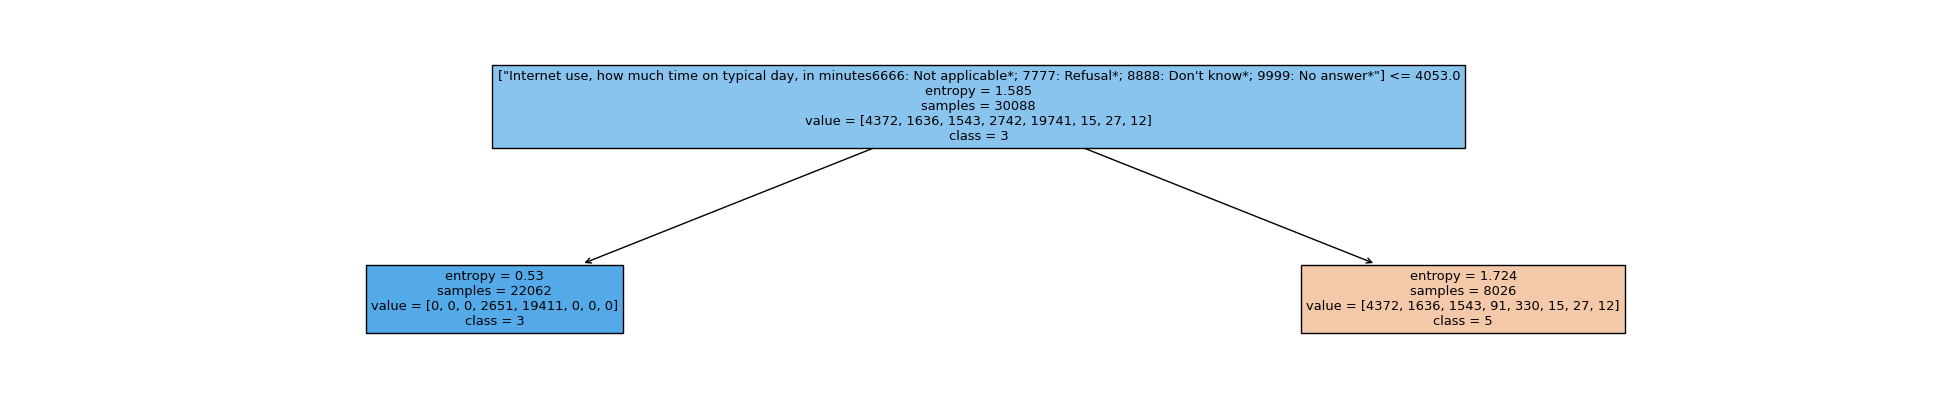

Accuracy is 0.7849262262395321
How interested in politics1: Very interested; 2: Quite interested; 3: Hardly interested; 4: Not at all interested; 7: Refusal*; 8: Don't know*; 9: No answer*


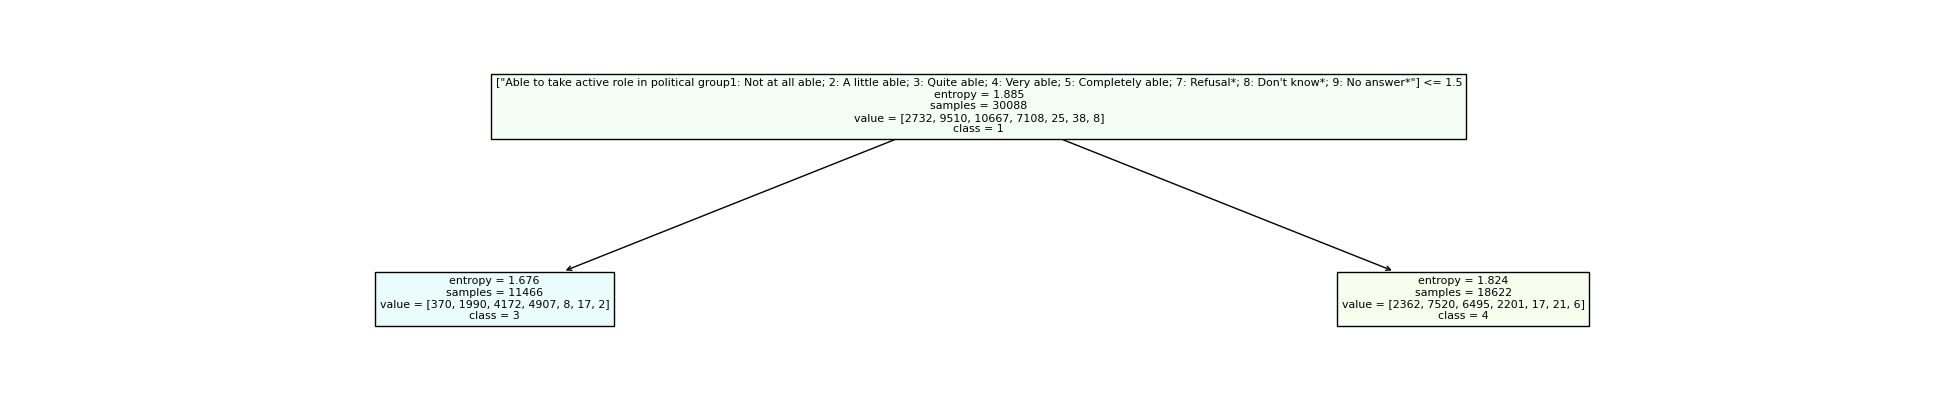

Accuracy is 0.40263192875182774
Confident in own ability to participate in politics1: Not at all confident; 2: A little confident; 3: Quite confident; 4: Very confident; 5: Completely confident; 7: Refusal*; 8: Don't know*; 9: No answer*


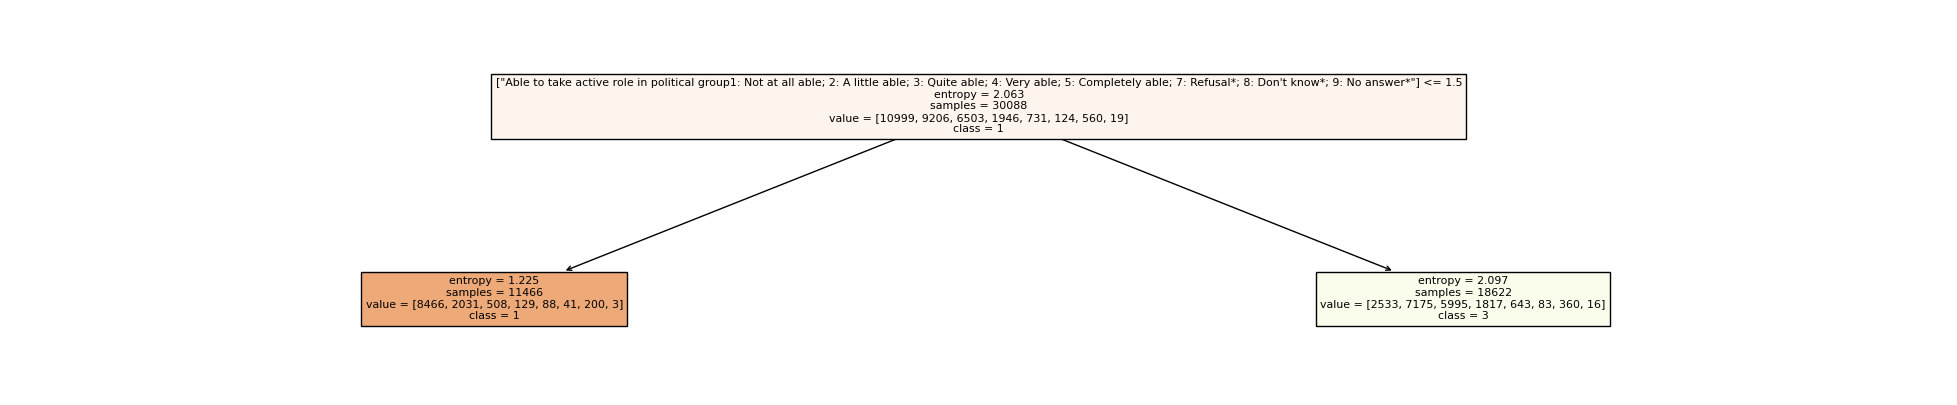

Accuracy is 0.5233284593912003
Trust in politicians0: No trust at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Complete trust; 77: Refusal*; 88: Don't know*; 99: No answer*


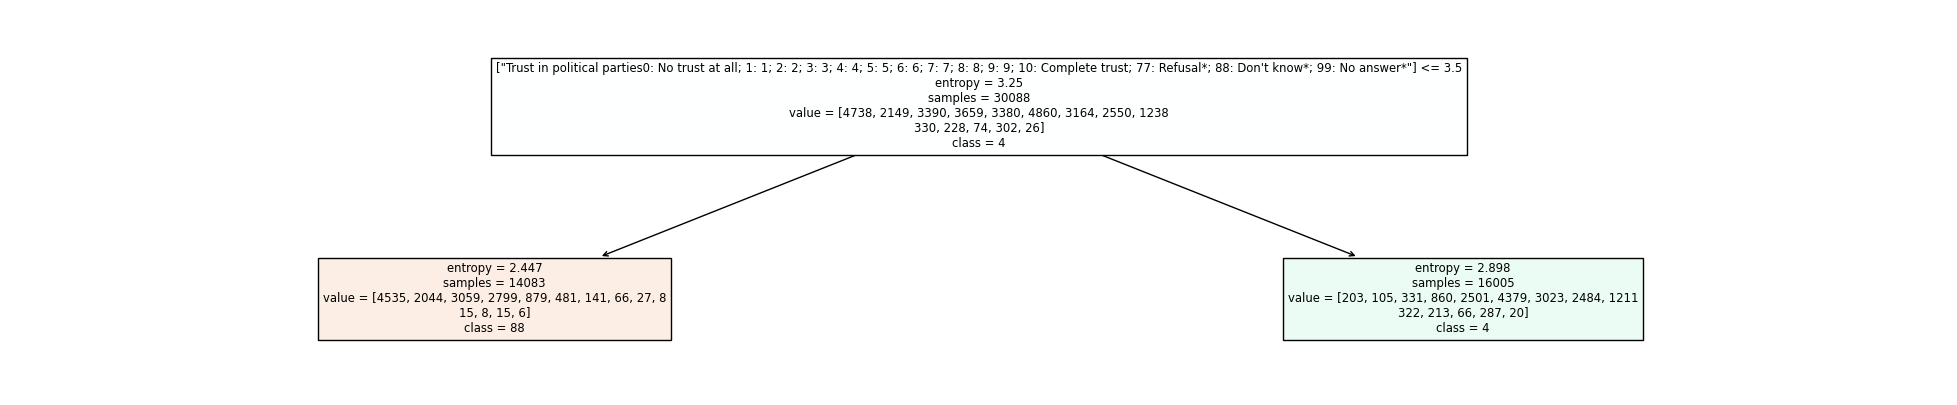

Accuracy is 0.285258540475874
Trust in political parties0: No trust at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Complete trust; 77: Refusal*; 88: Don't know*; 99: No answer*


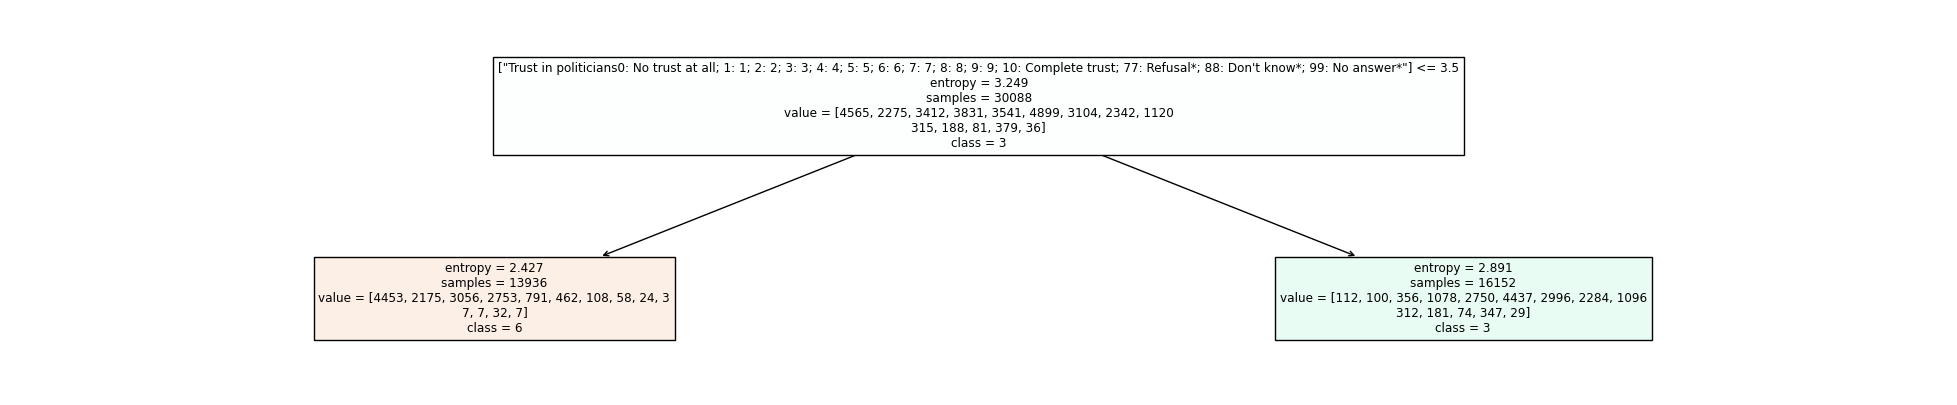

Accuracy is 0.2904426425628074
Trust in the European Parliament0: No trust at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Complete trust; 77: Refusal*; 88: Don't know*; 99: No answer*


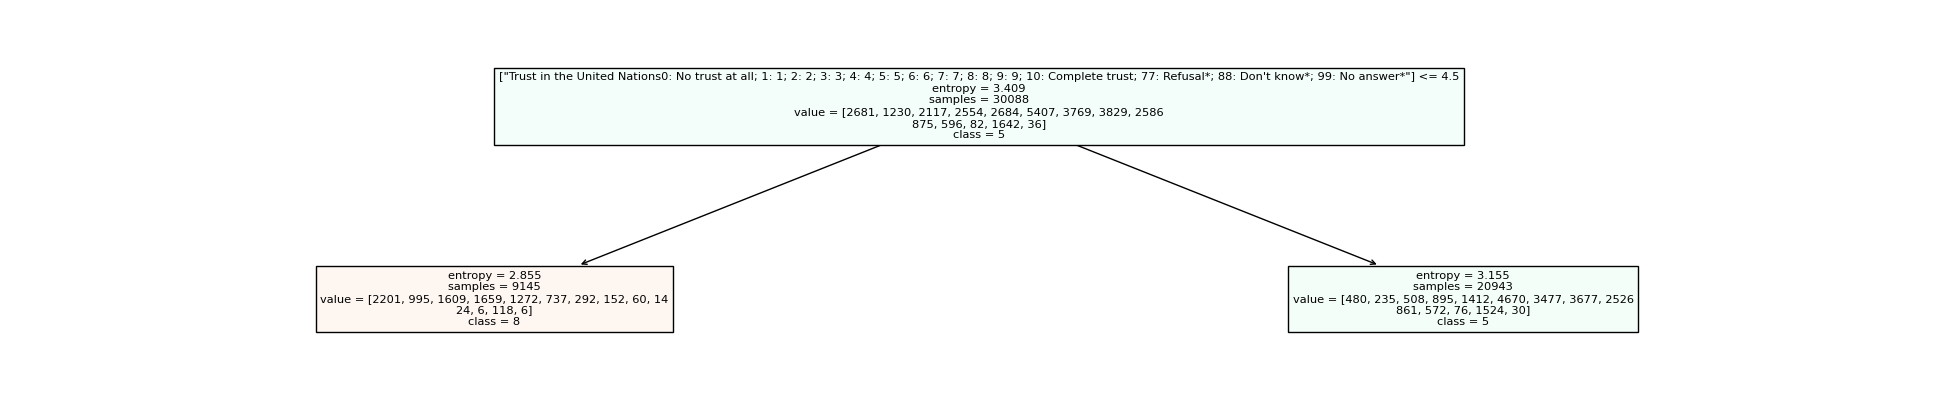

Accuracy is 0.22265053834906287
Trust in the United Nations0: No trust at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Complete trust; 77: Refusal*; 88: Don't know*; 99: No answer*


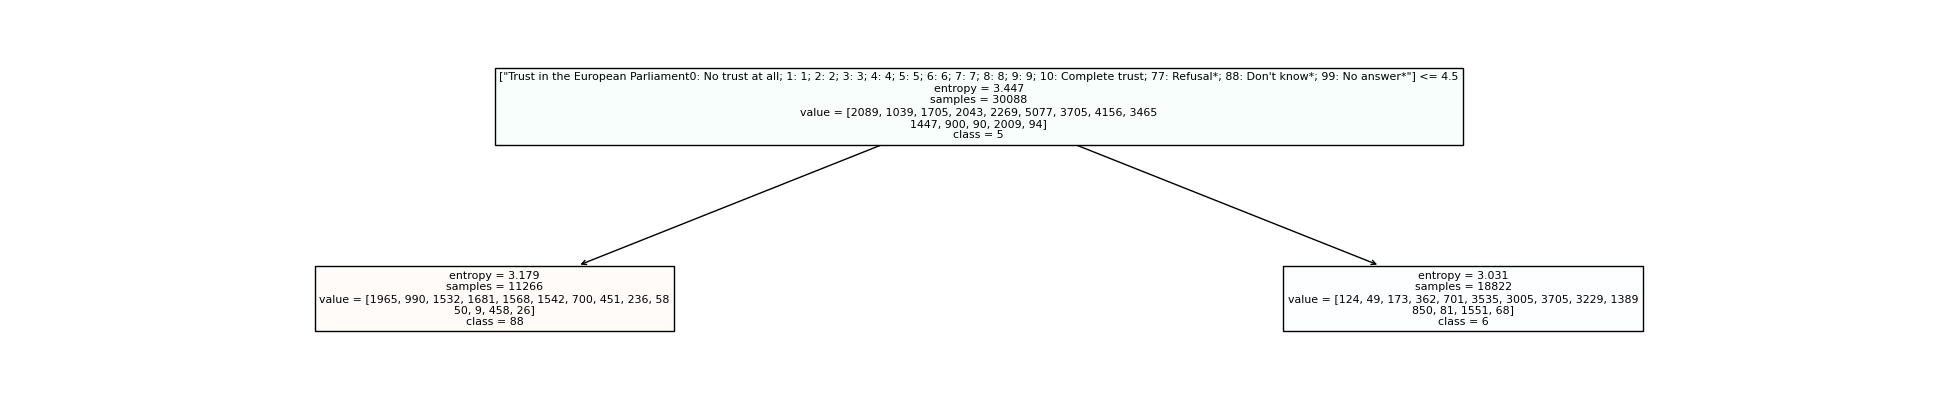

Accuracy is 0.1815764987372059
Trust in scientists0: No trust at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Complete trust; 77: Refusal*; 88: Don't know*; 99: No answer*


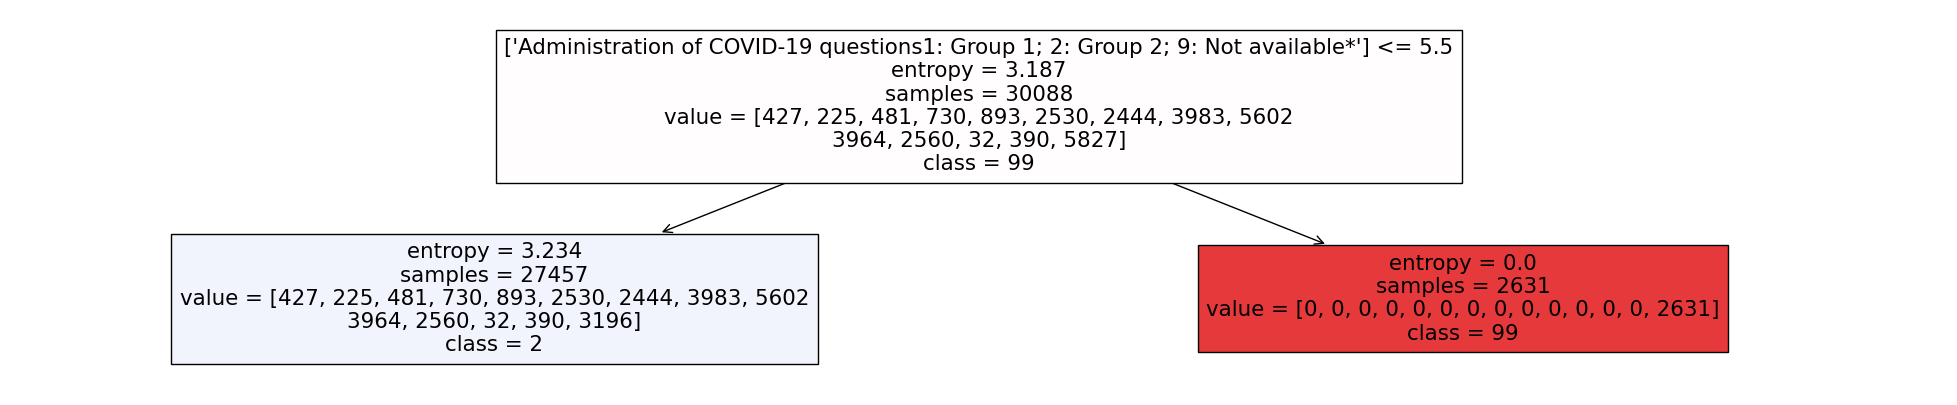

Accuracy is 0.2714342682440516
Contacted politician or government official last 12 months1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


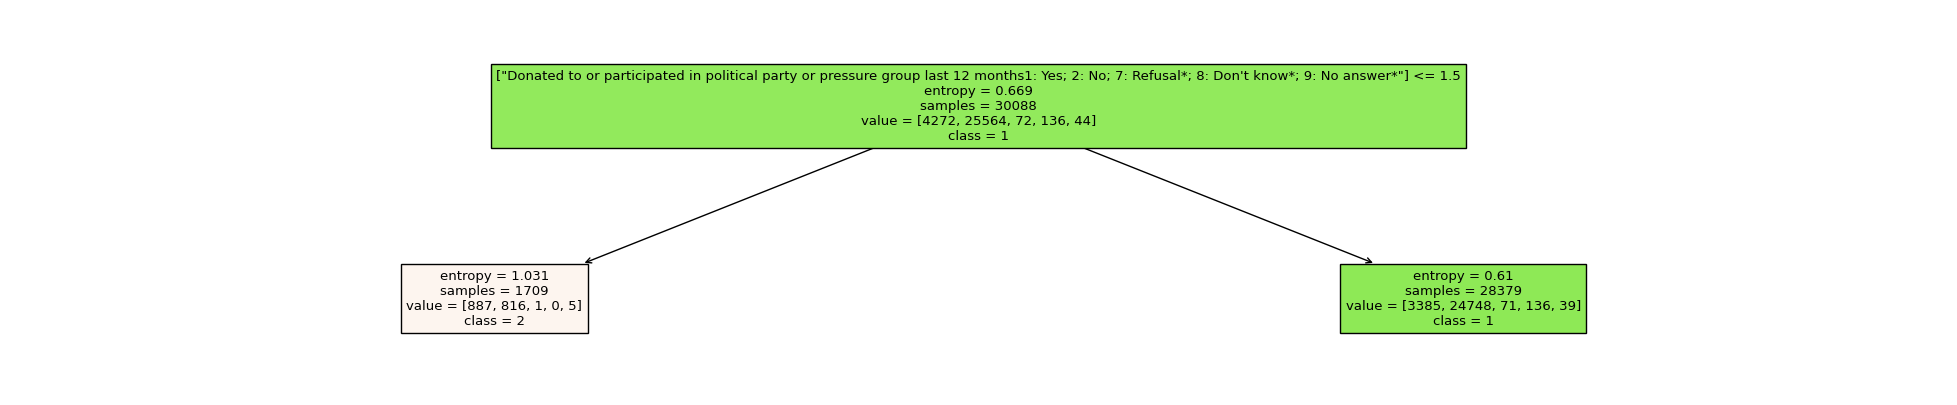

Accuracy is 0.8480659311444902
Donated to or participated in political party or pressure group last 12 months1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


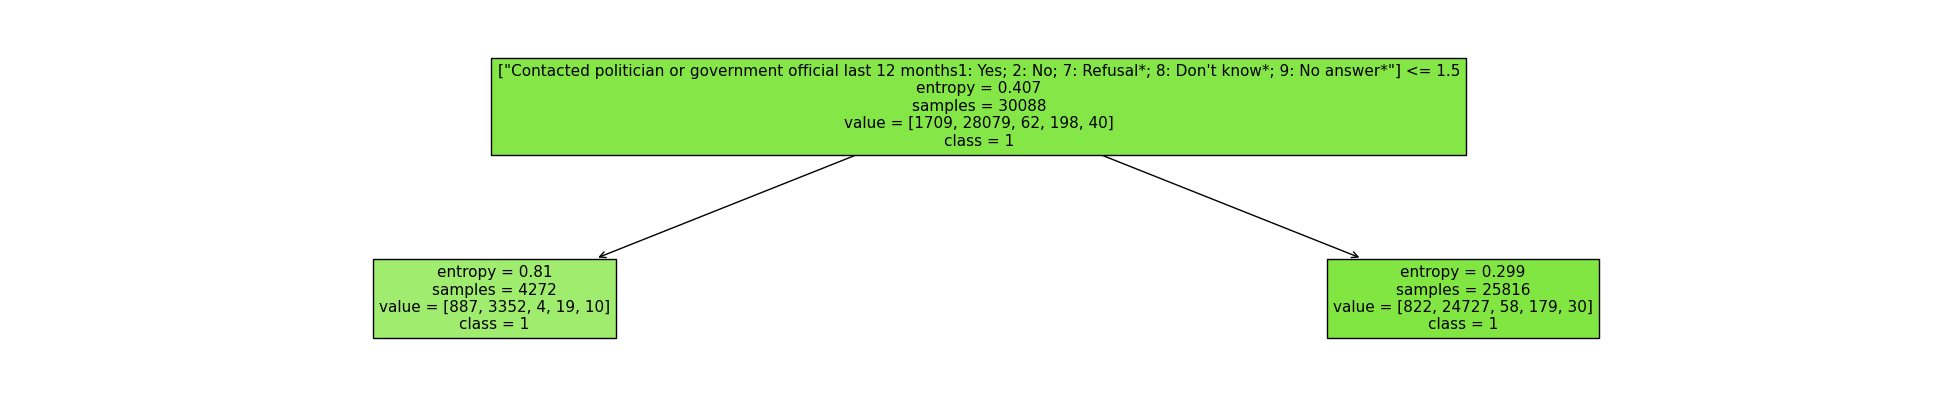

Accuracy is 0.9343347068988436
Worn or displayed campaign badge/sticker last 12 months1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


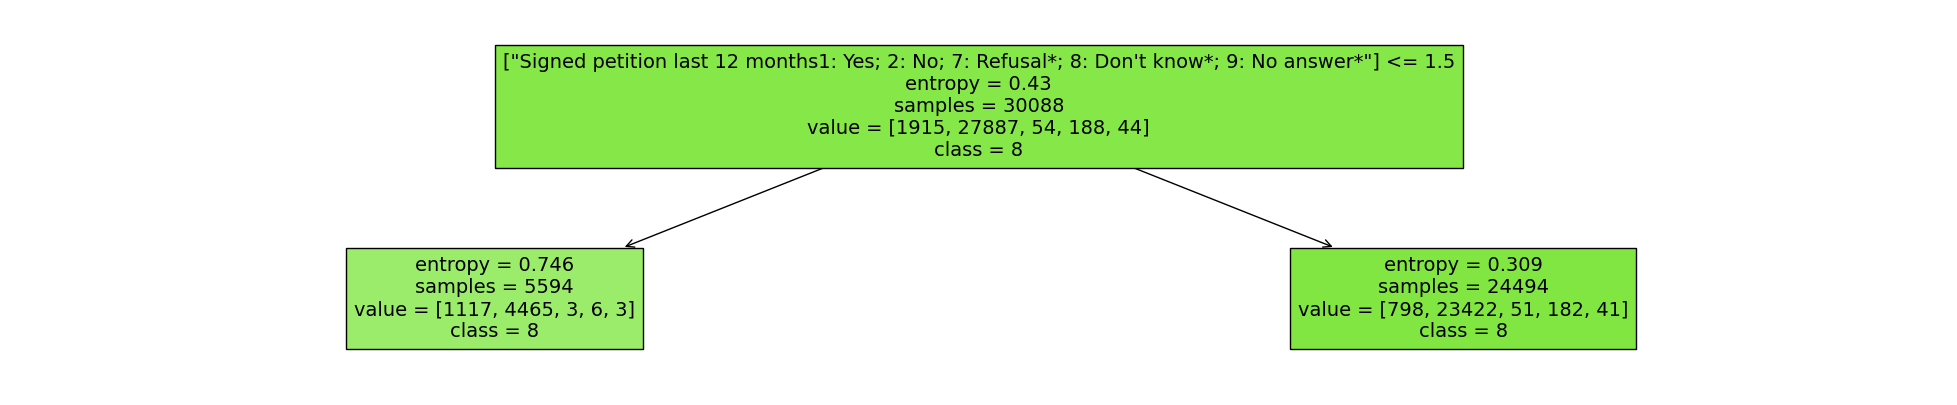

Accuracy is 0.9263591652266383
Boycotted certain products last 12 months1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


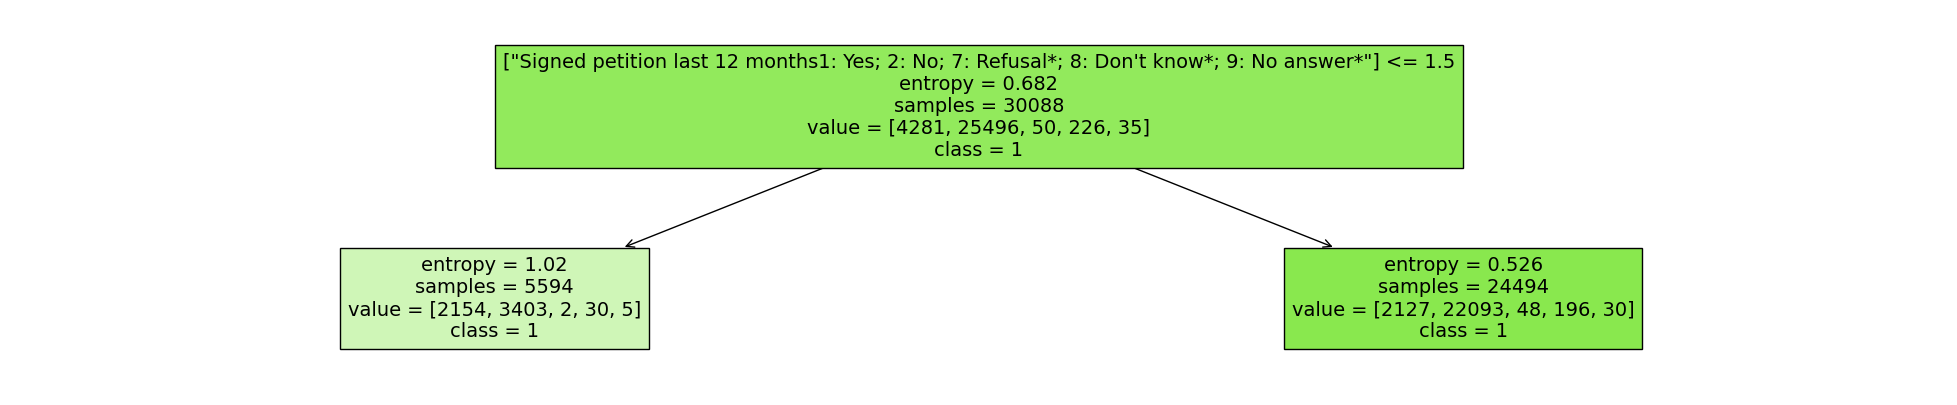

Accuracy is 0.8460720457264389
Posted or shared anything about politics online last 12 months1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


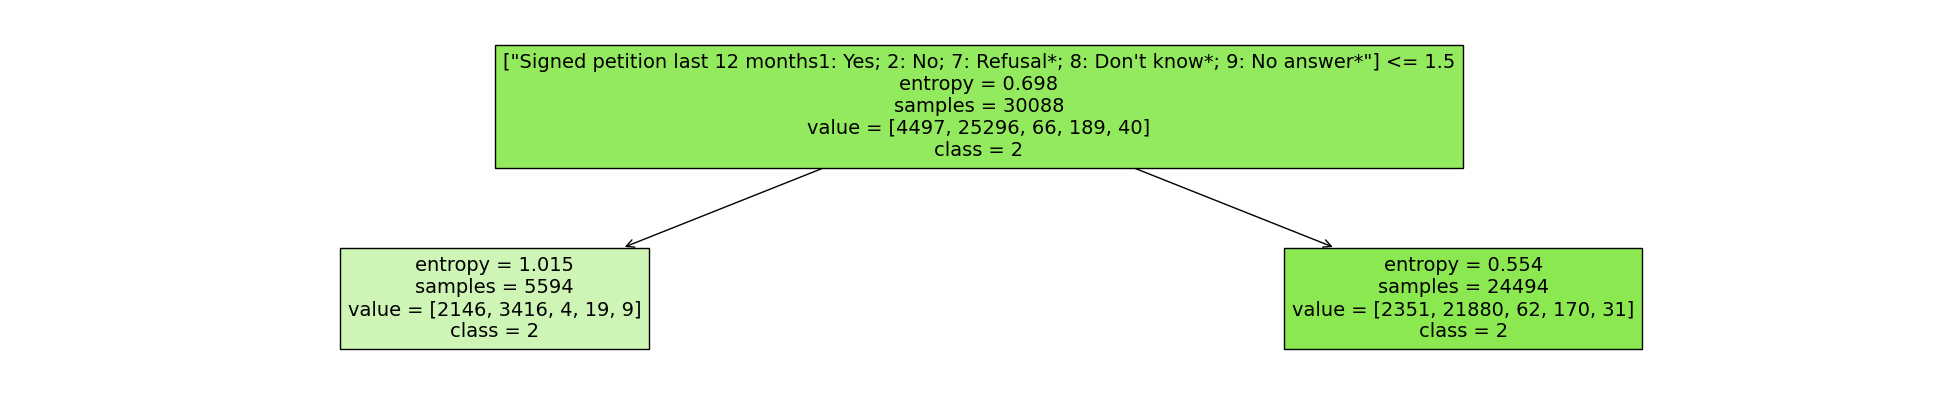

Accuracy is 0.8426159776684833
Feel closer to a particular party than all other parties1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


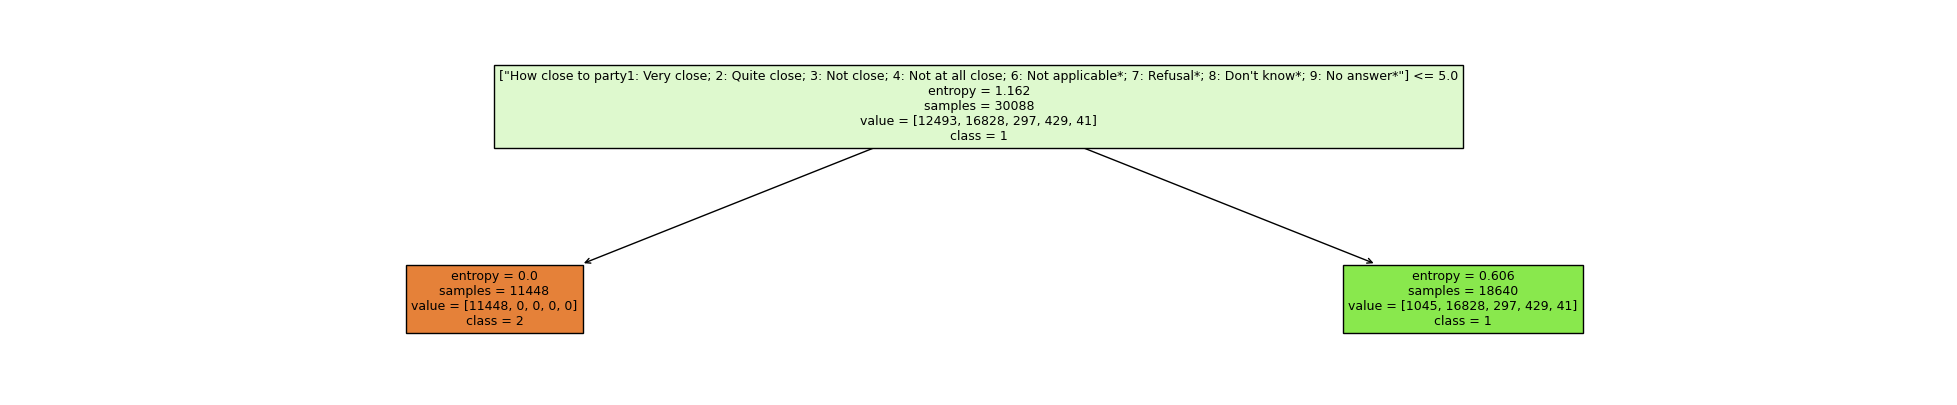

Accuracy is 0.9413797687092915
Country needs most loyalty towards its leaders1: Agree strongly; 2: Agree; 3: Neither agree nor disagree; 4: Disagree; 5: Disagree strongly; 7: Refusal*; 8: Don't know*; 9: No answer*


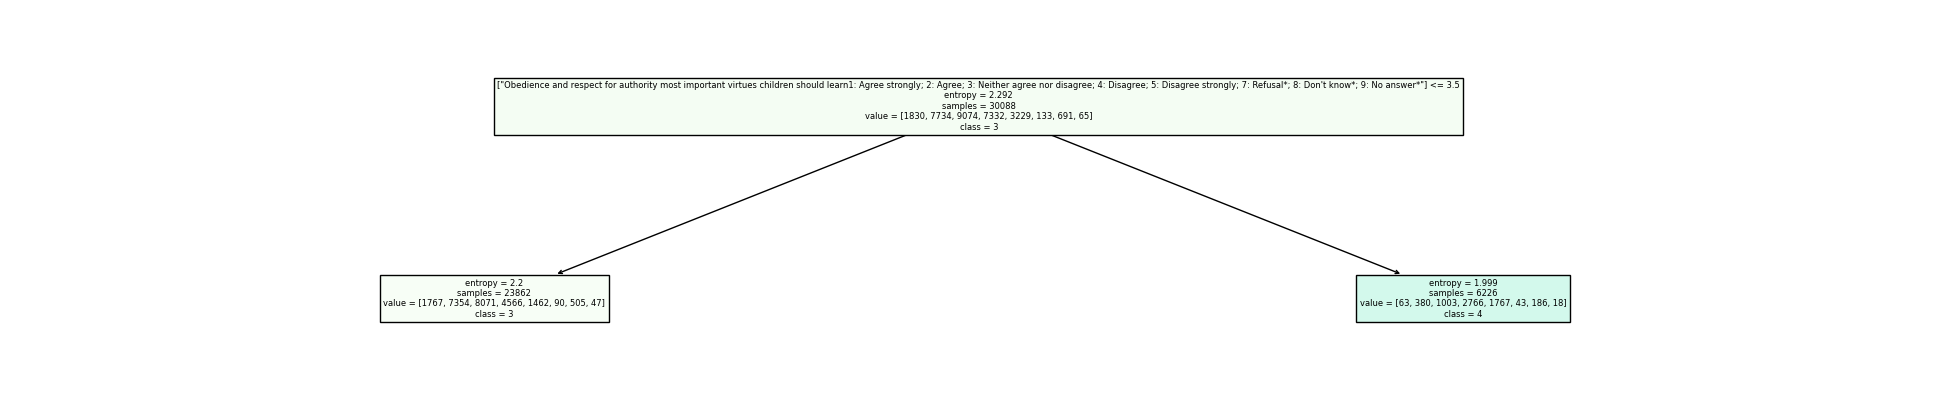

Accuracy is 0.35570915858035357
How often socially meet with friends, relatives or colleagues1: Never; 2: Less than once a month; 3: Once a month; 4: Several times a month; 5: Once a week; 6: Several times a week; 7: Every day; 77: Refusal*; 88: Don't know*; 99: No answer*


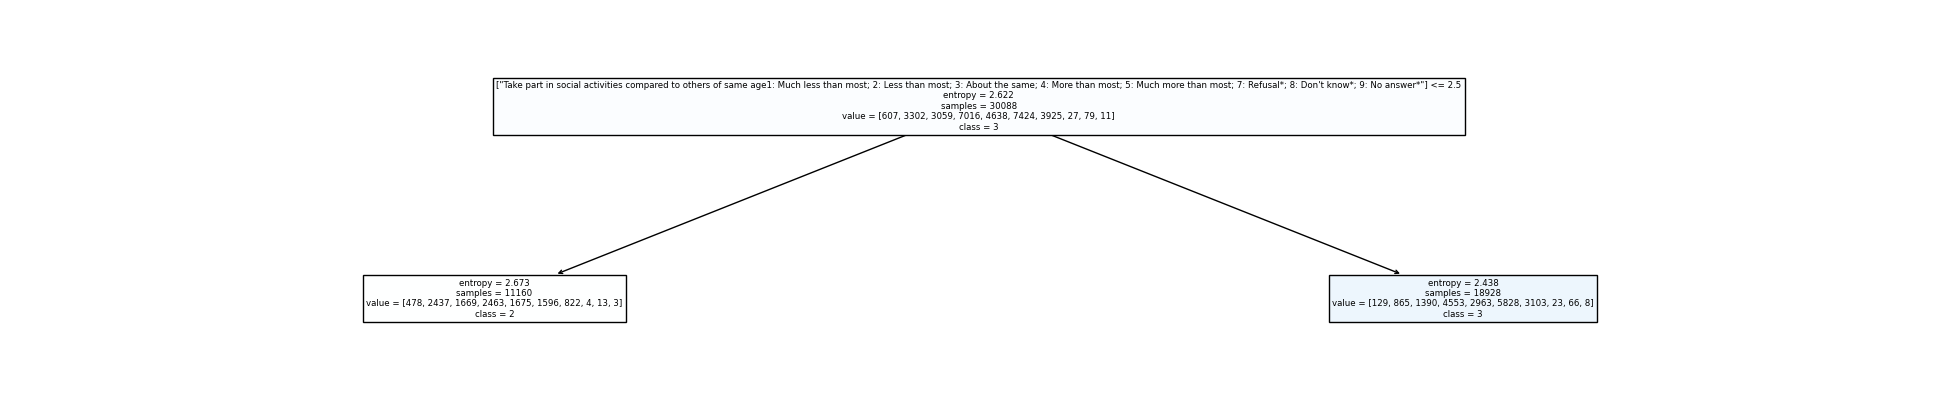

Accuracy is 0.26518676060082413
Belonging to particular religion or denomination1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


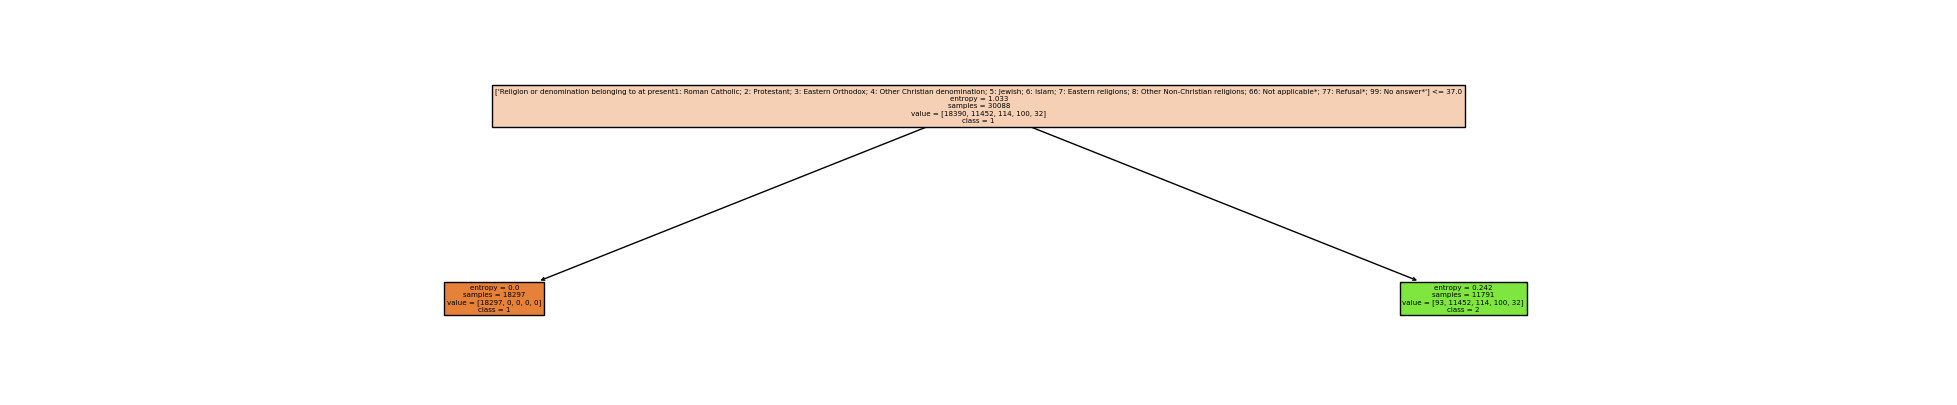

Accuracy is 0.9893659444370597
Ever belonging to particular religion or denomination1: Yes; 2: No; 6: Not applicable*; 7: Refusal*; 8: Don't know*; 9: No answer*


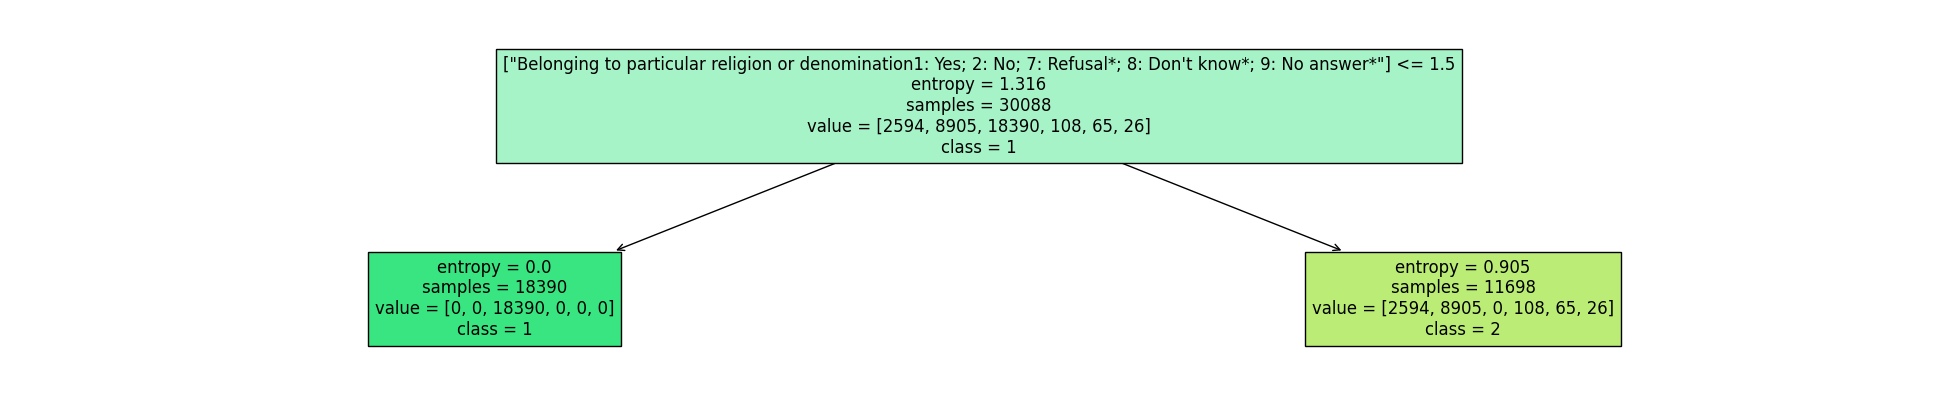

Accuracy is 0.9109397846603748
How often attend religious services apart from special occasions1: Every day; 2: More than once a week; 3: Once a week; 4: At least once a month; 5: Only on special holy days; 6: Less often; 7: Never; 77: Refusal*; 88: Don't know*; 99: No answer*


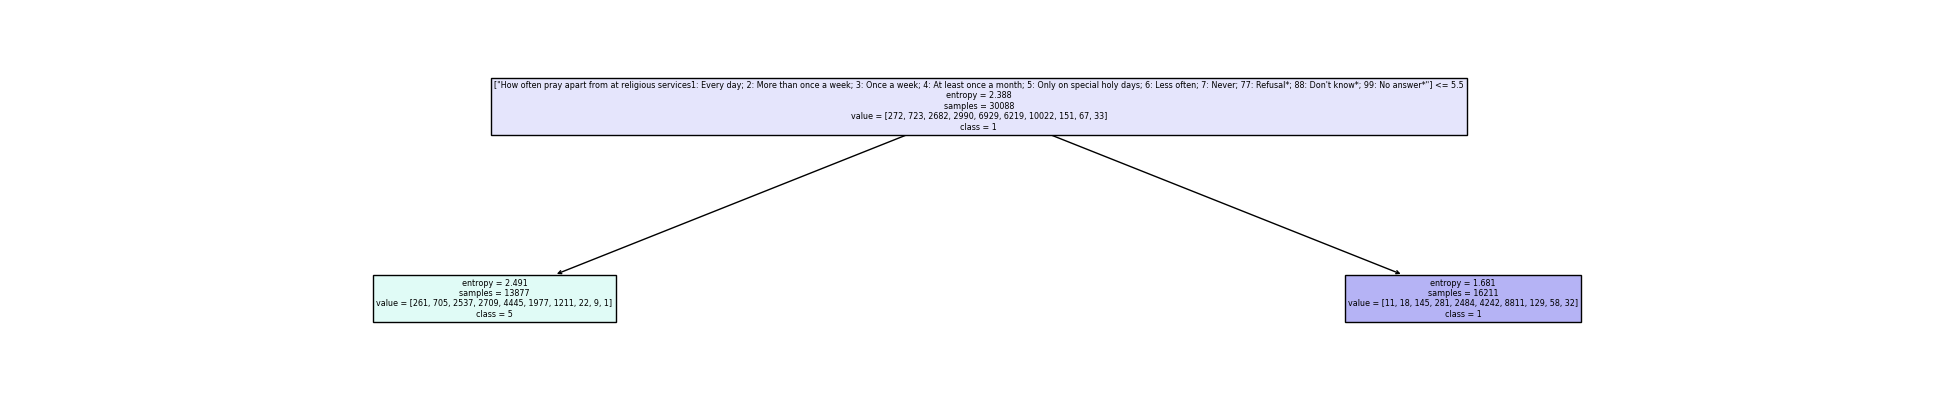

Accuracy is 0.4430413398910009
How often pray apart from at religious services1: Every day; 2: More than once a week; 3: Once a week; 4: At least once a month; 5: Only on special holy days; 6: Less often; 7: Never; 77: Refusal*; 88: Don't know*; 99: No answer*


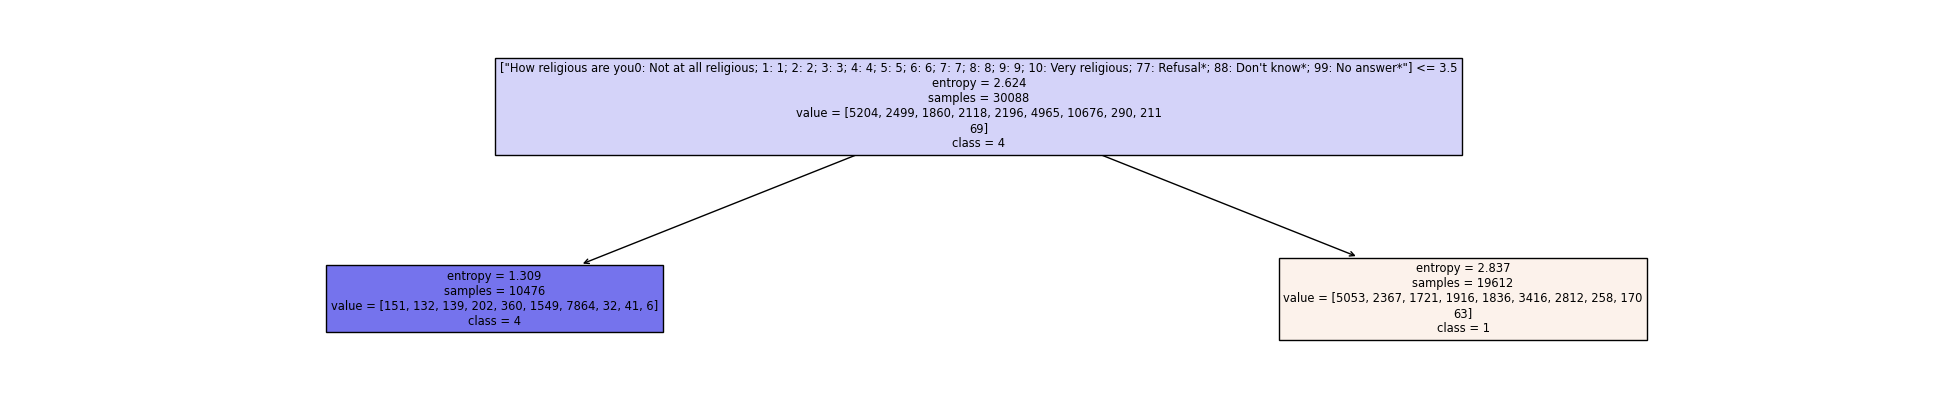

Accuracy is 0.42589392529575965
To what extent feel personal responsibility to reduce climate change0: Not at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: A great deal; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


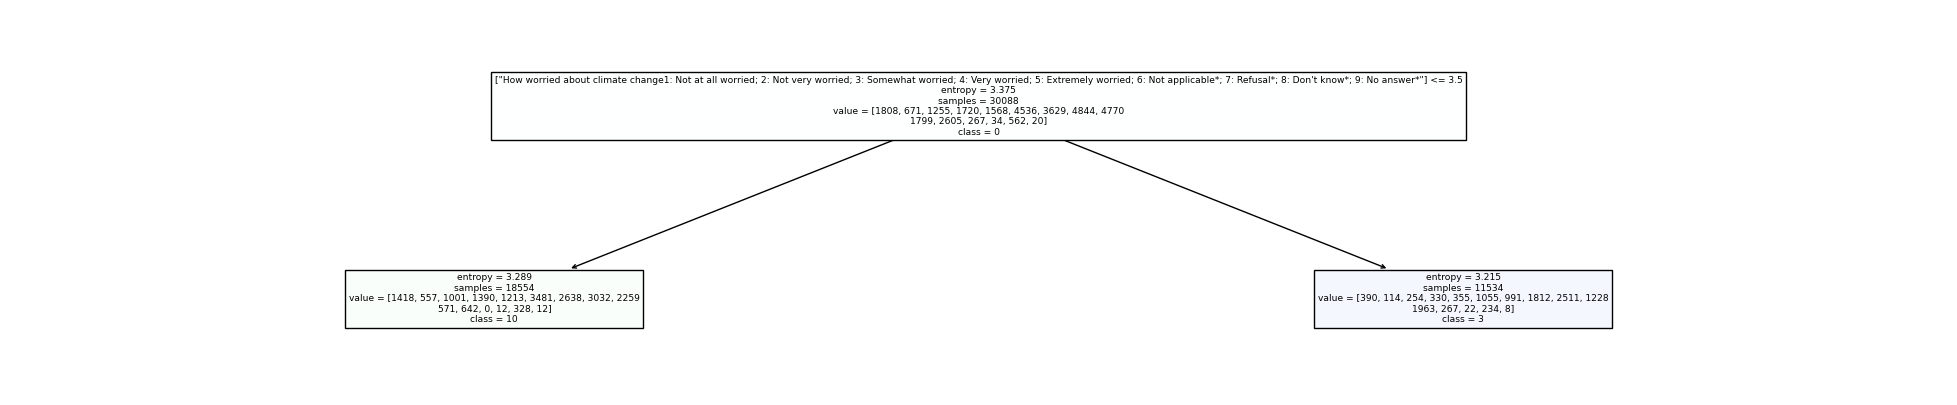

Accuracy is 0.19221055430014622
The media are free to criticise the government0: Not at all important for democracy in general; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Extremely important for democracy in general; 77: Refusal*; 88: Don't know*; 99: No answer*


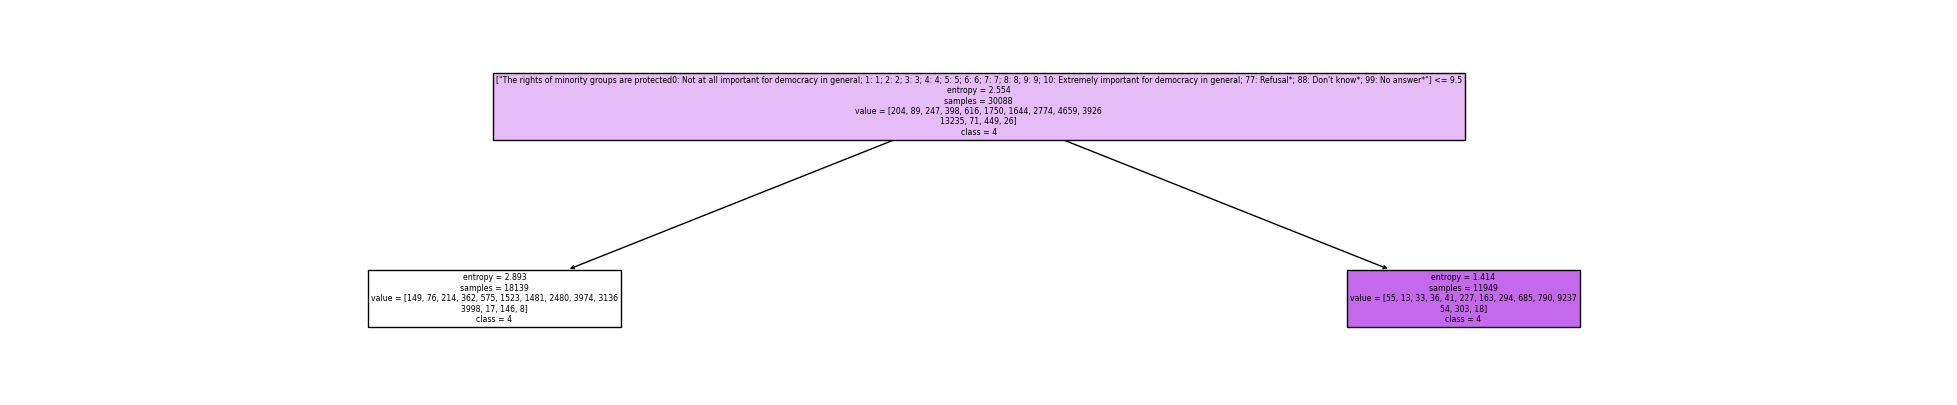

Accuracy is 0.44503522530905226
In country the media are free to criticise the government0: Does not apply at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Applies completely; 77: Refusal*; 88: Don't know*; 99: No answer*


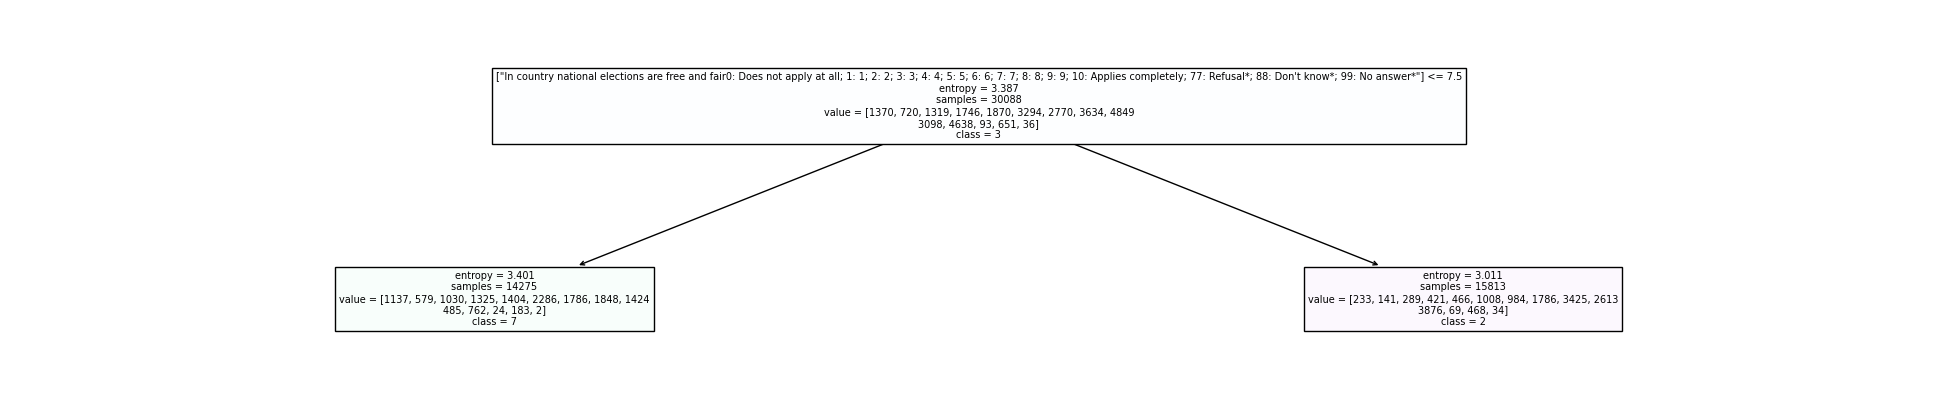

Accuracy is 0.1975275820816164
Best for democracy: government changes policies in response to what most people think1: Government should change its policies; 2: Government should stick to its policies; 5: It depends on the circumstances; 7: Refusal*; 8: Don't know*; 9: No answer*


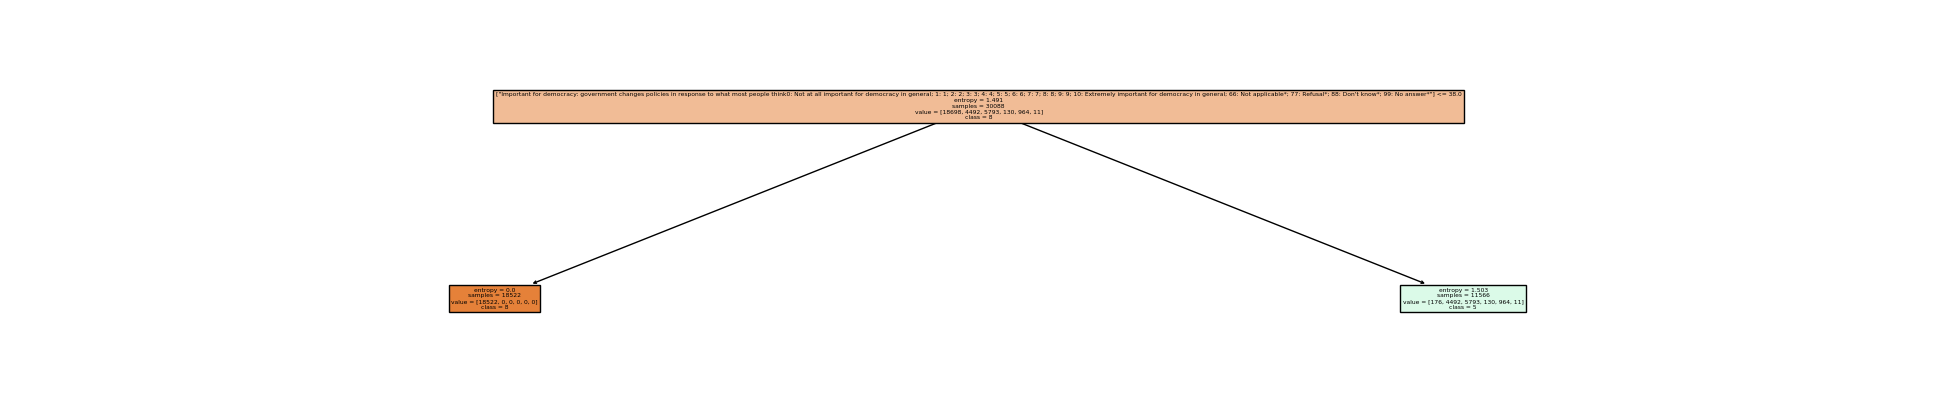

Accuracy is 0.8069918915326333
Important for democracy: government sticks to policies regardless of what most people think0: Not at all important for democracy in general; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Extremely important for democracy in general; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


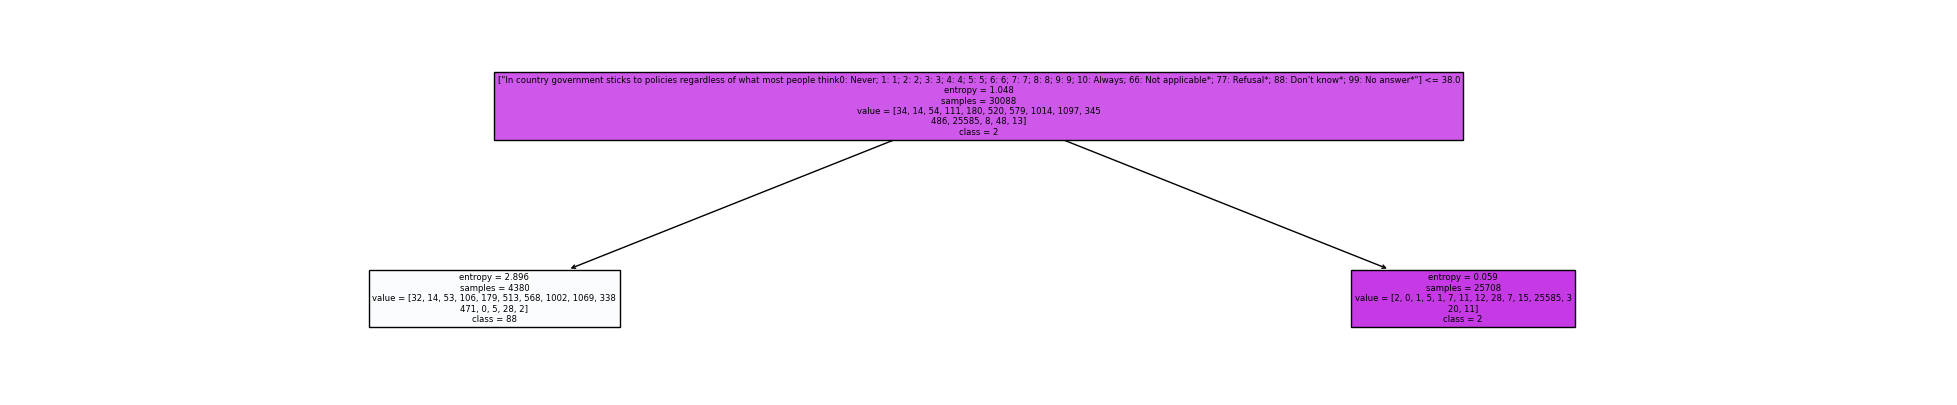

Accuracy is 0.8862156054765387
Improve knowledge/skills: course/lecture/conference, last 12 months1: Yes; 2: No; 7: Refusal*; 8: Don't know*; 9: No answer*


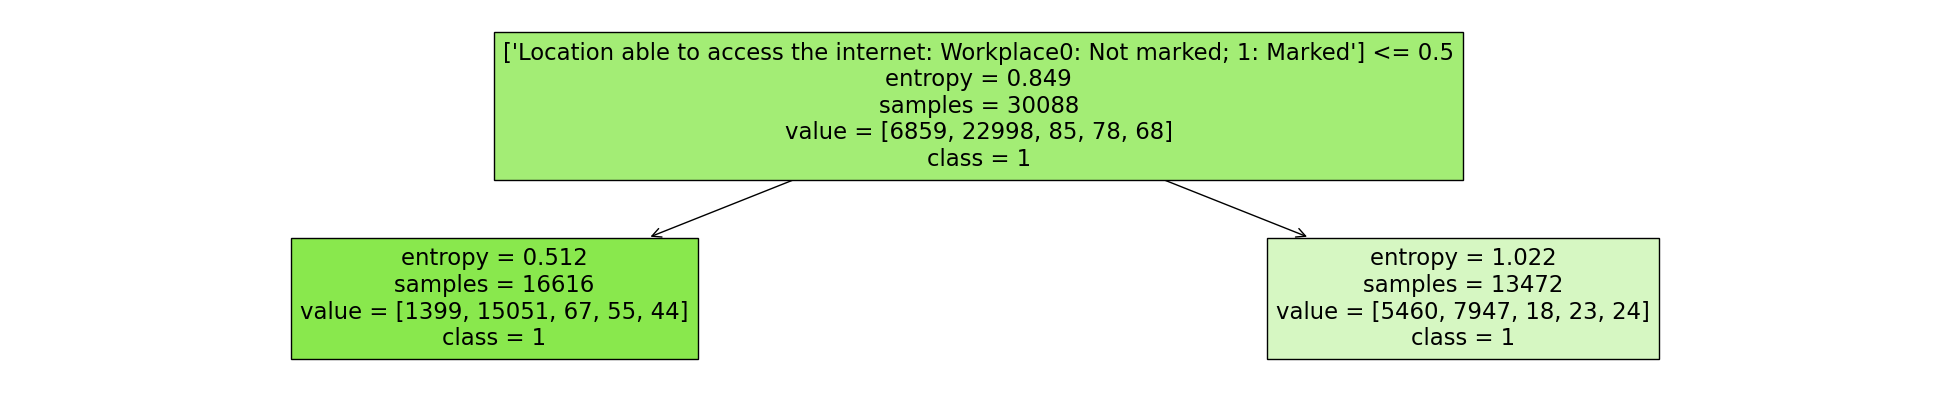

Accuracy is 0.7728299880366875
Online/mobile communication exposes people to misinformation0: Not at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Completely; 77: Refusal*; 88: Don't know*; 99: No answer*


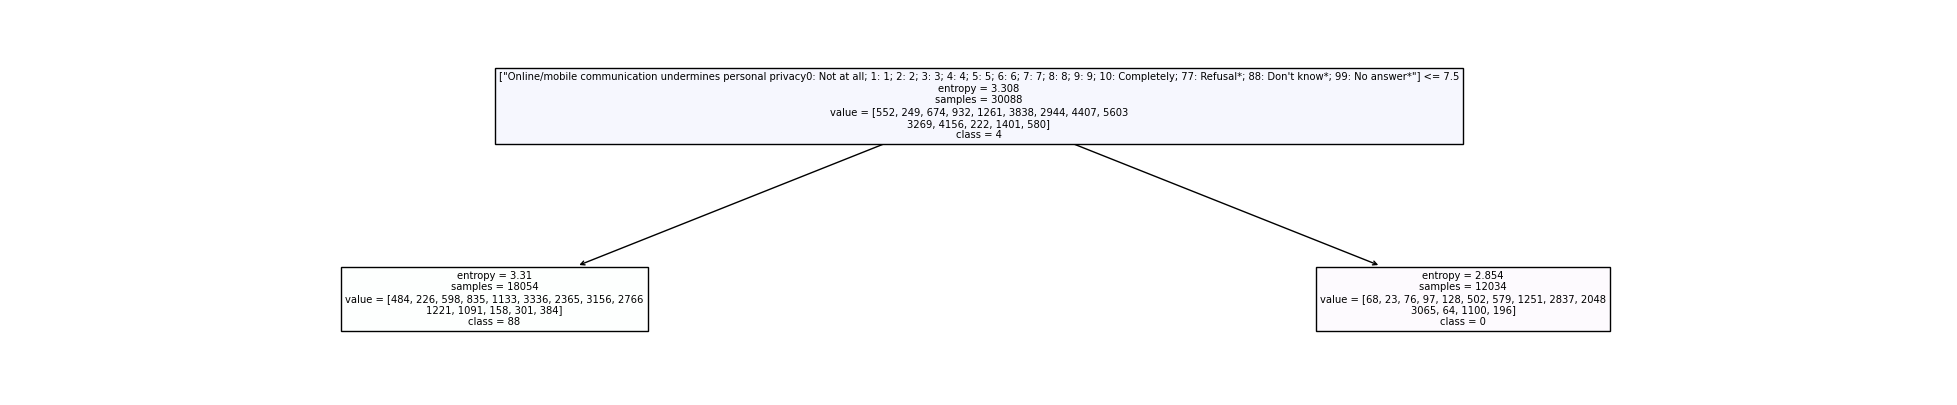

Accuracy is 0.2145420709823209
Communicate with parent via text, email or messaging apps, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


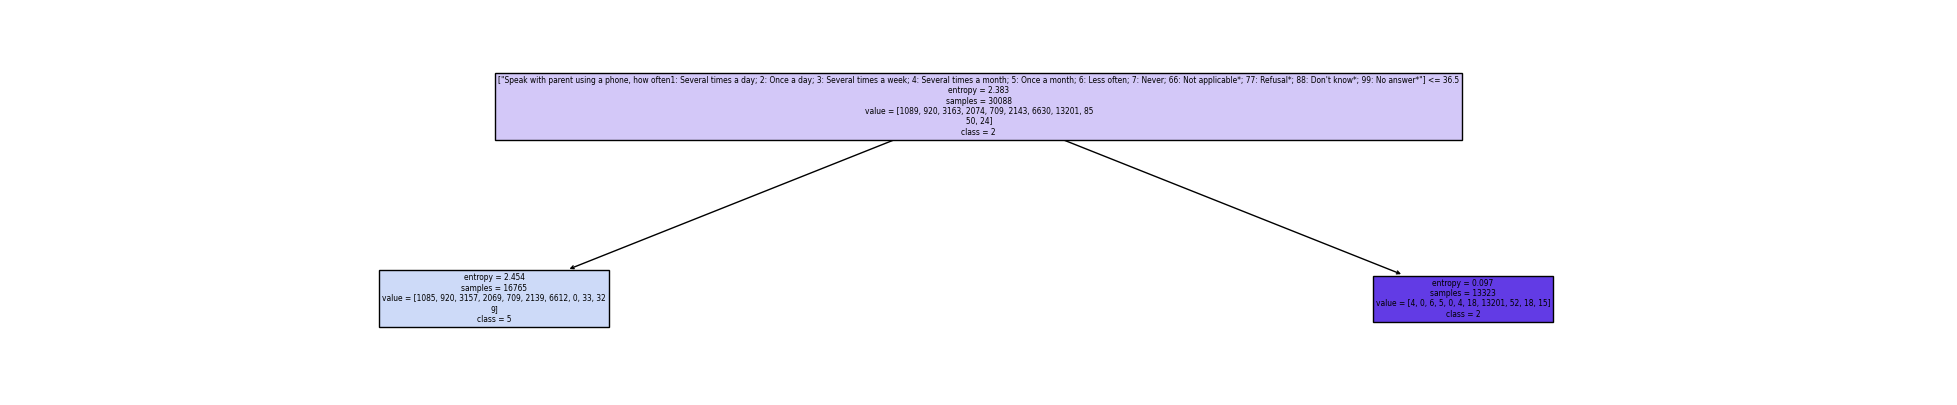

Accuracy is 0.6591785192077628
Too tired after work to enjoy things like doing at home, how often1: Never; 2: Hardly ever; 3: Sometimes; 4: Often; 5: Always; 6: Not applicable*; 7: Refusal*; 8: Don't know*; 9: No answer*


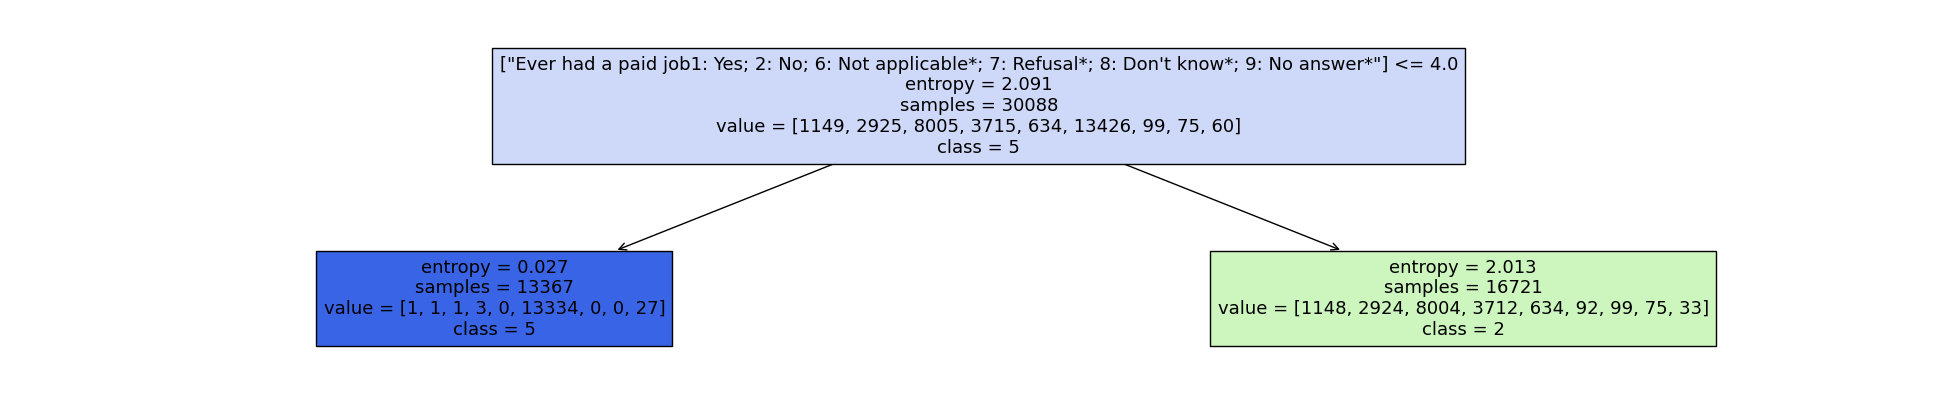

Accuracy is 0.6908148345075104
Speak with line manager about work in person, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


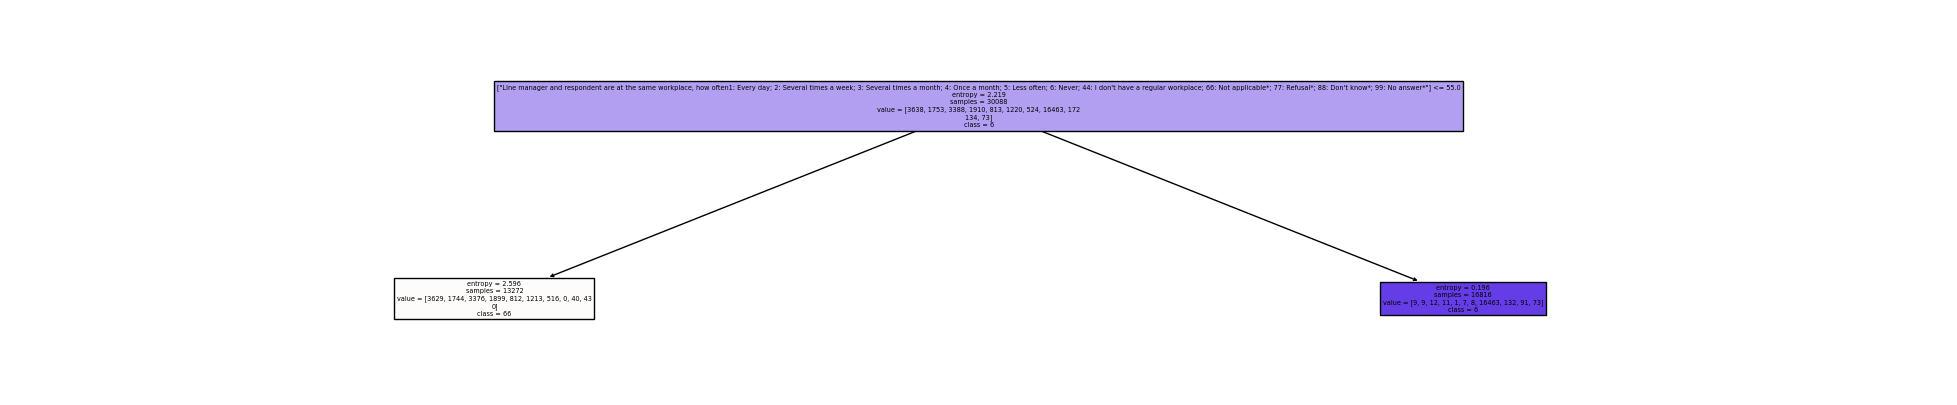

Accuracy is 0.6675528379635783
Speak with line manager about work and see each other on a screen, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


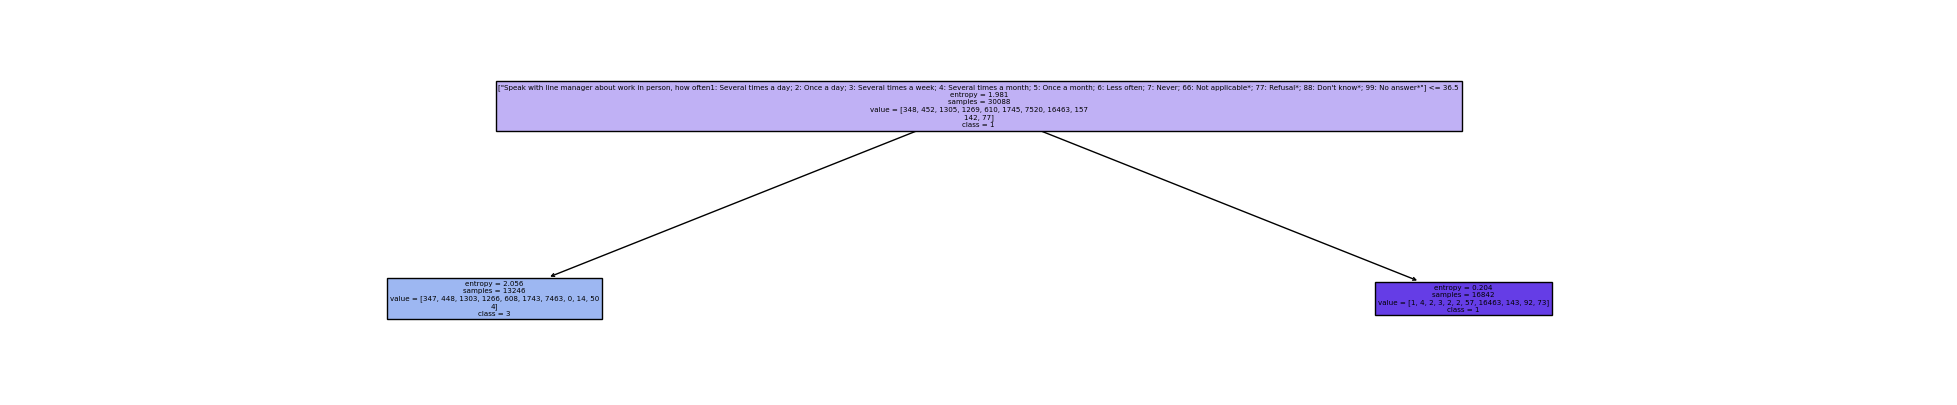

Accuracy is 0.7975541672205237
Communicate with line manager about work via text, email or messaging apps, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


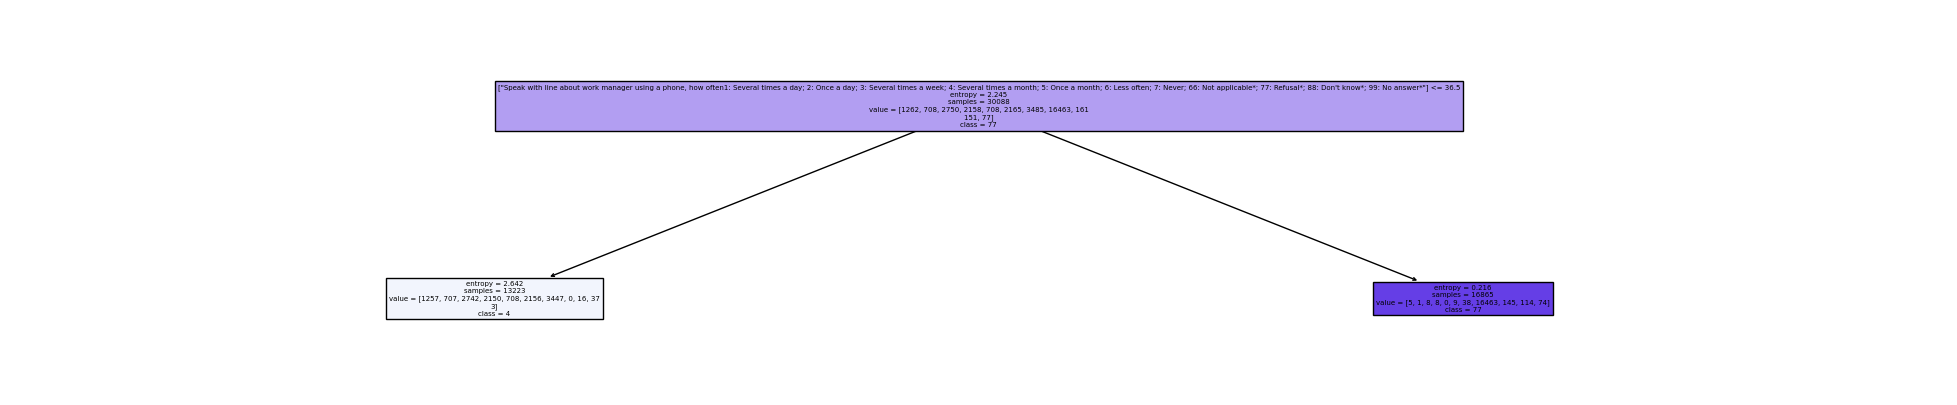

Accuracy is 0.6566529310115645
Speak with colleagues in person, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


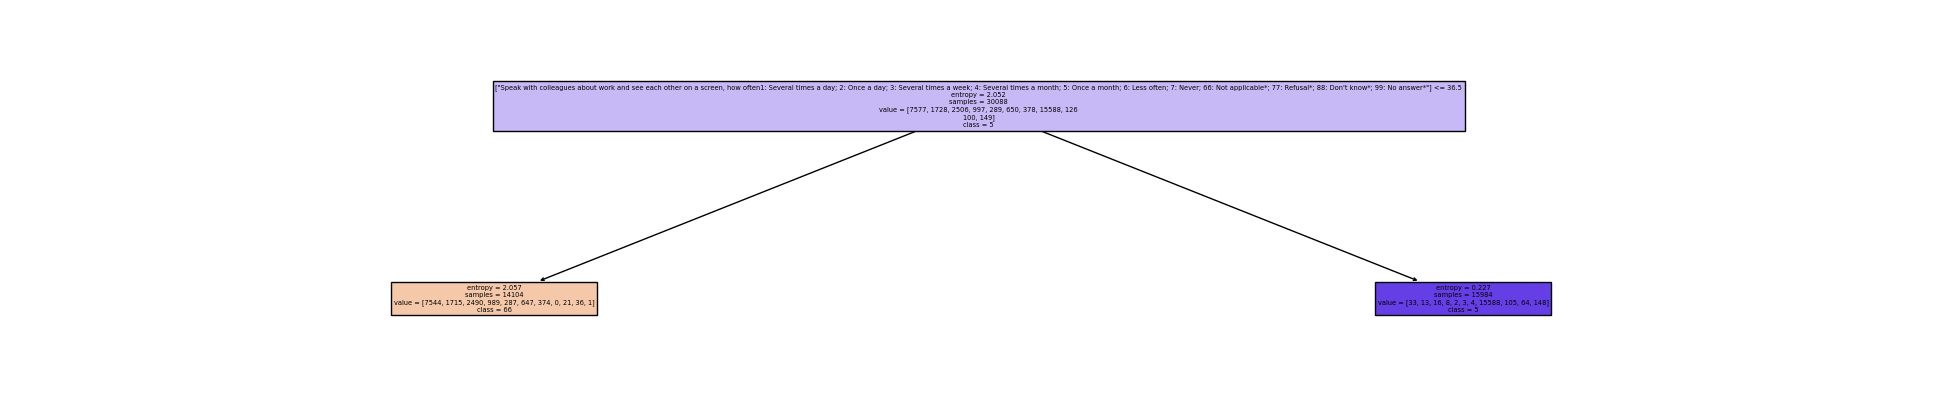

Accuracy is 0.7657849262262395
Speak with colleagues about work and see each other on a screen, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


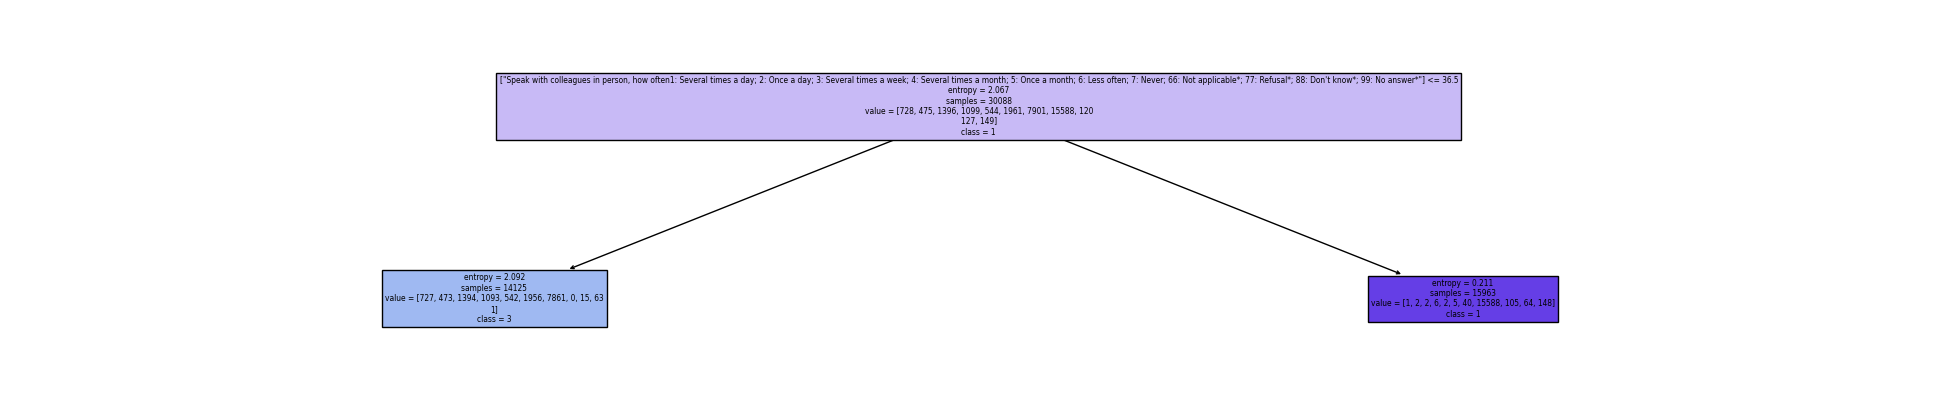

Accuracy is 0.7782799415126944
Speak with colleagues about work using a phone, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


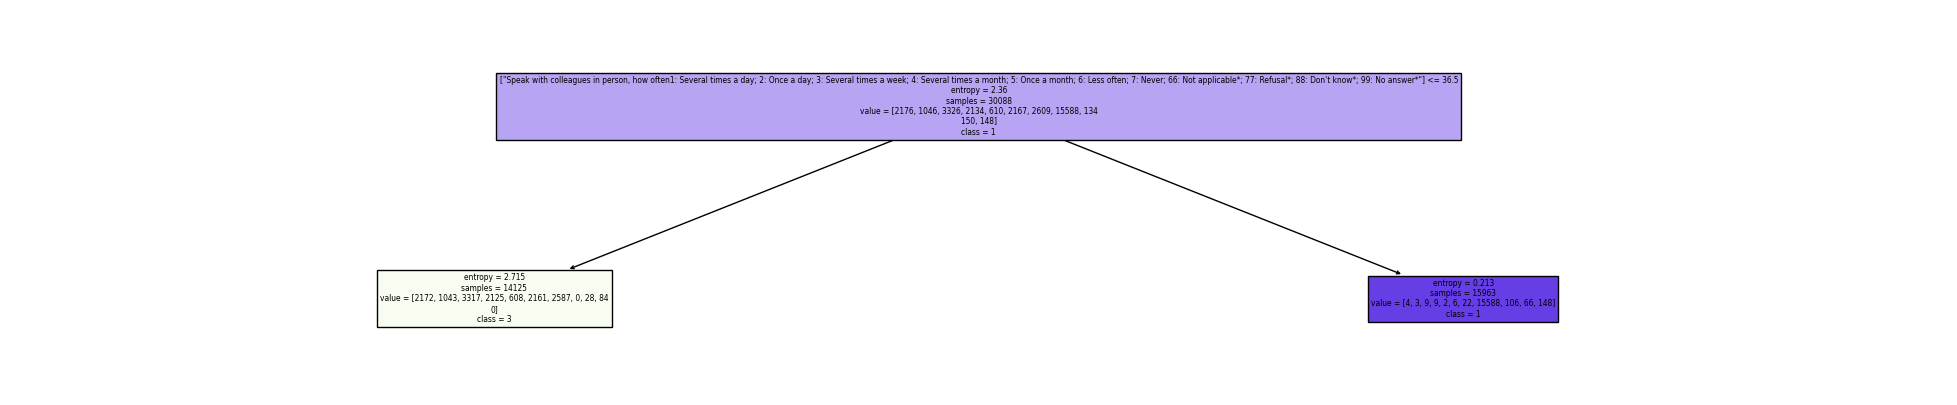

Accuracy is 0.6208959191811777
Communicate with colleagues about work via text, email or messaging apps, how often1: Several times a day; 2: Once a day; 3: Several times a week; 4: Several times a month; 5: Once a month; 6: Less often; 7: Never; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


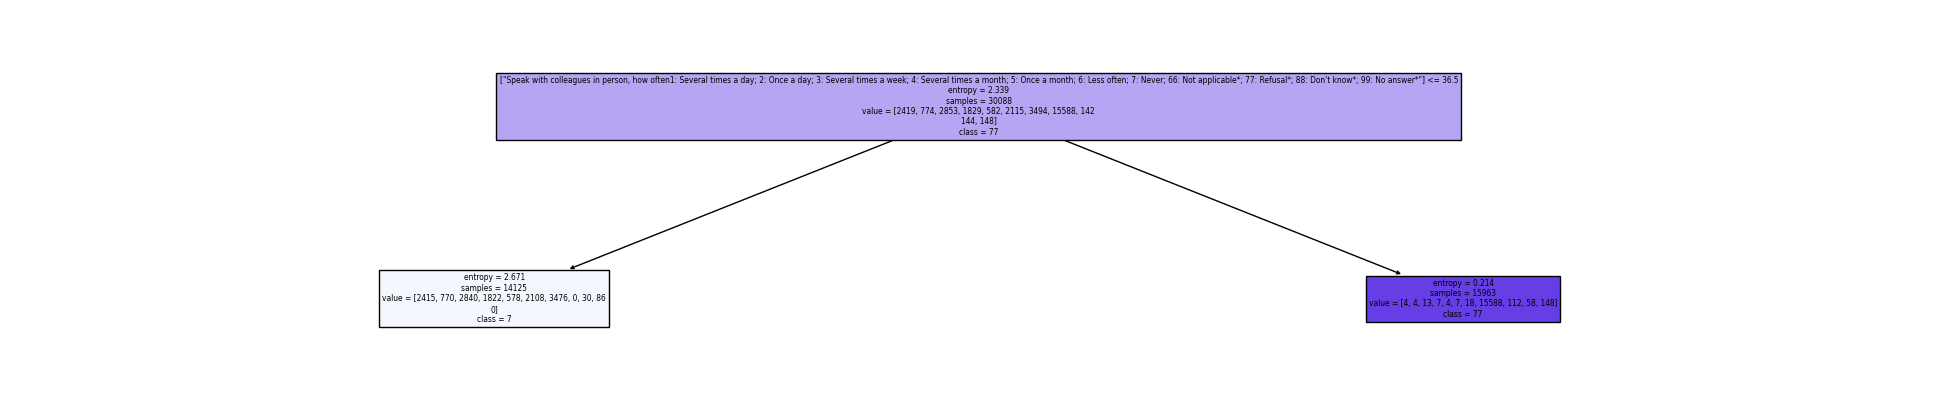

Accuracy is 0.6271434268244052
Speak with people you work with in person, how often compared with before COVID-191: Much more often now; 2: A little more often now; 3: About the same; 4: A little less often now; 5: Much less often now; 55: We are never in the same location now due to the pandemic; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


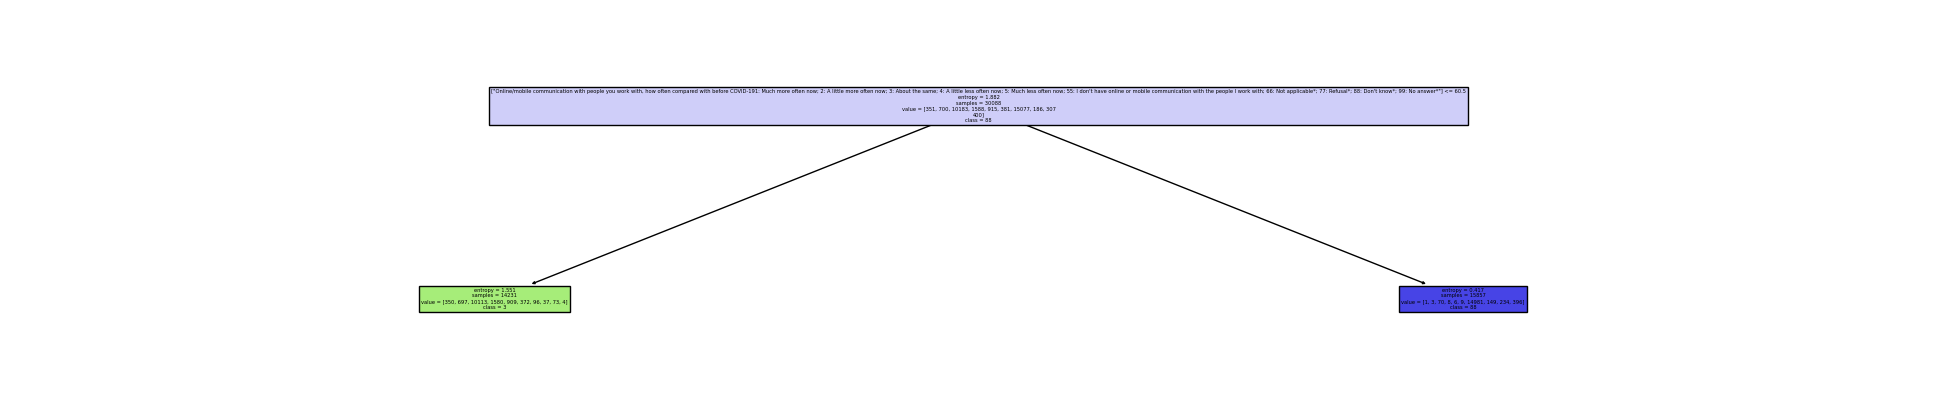

Accuracy is 0.8281270769639771
Online/mobile communication with people you work with, how often compared with before COVID-191: Much more often now; 2: A little more often now; 3: About the same; 4: A little less often now; 5: Much less often now; 55: I don't have online or mobile communication with the people I work with; 66: Not applicable*; 77: Refusal*; 88: Don't know*; 99: No answer*


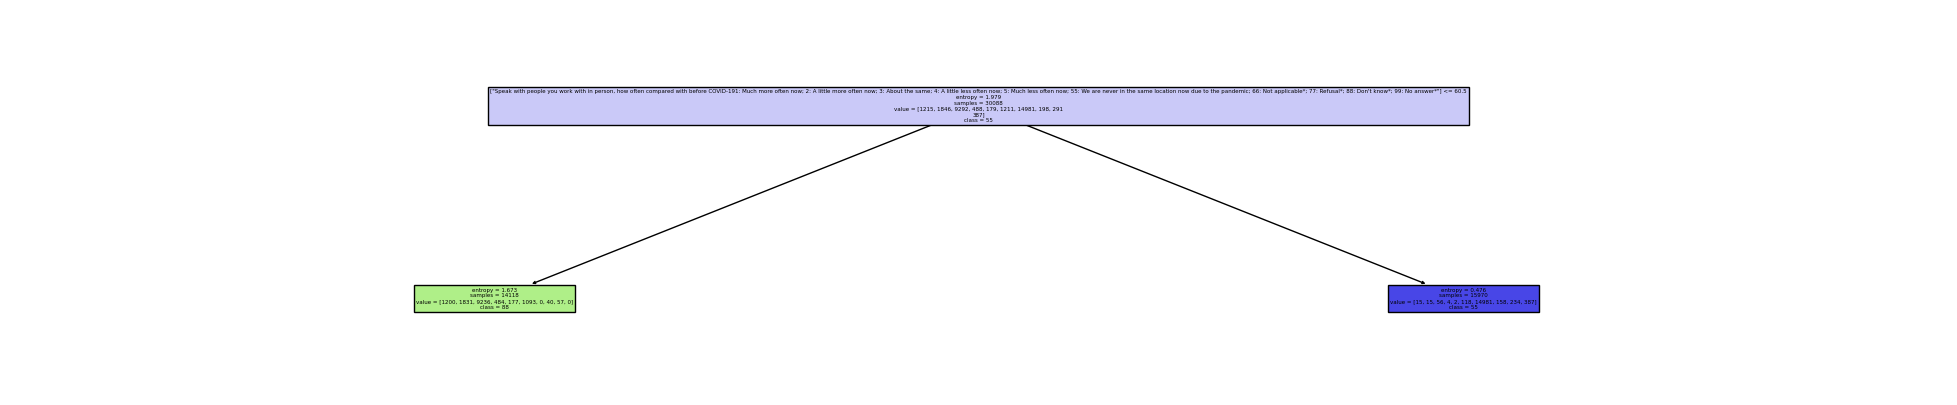

Accuracy is 0.7994151269440383
Important to try new and different things in life1: Very much like me; 2: Like me; 3: Somewhat like me; 4: A little like me; 5: Not like me; 6: Not like me at all; 7: Refusal*; 8: Don't know*; 9: No answer*


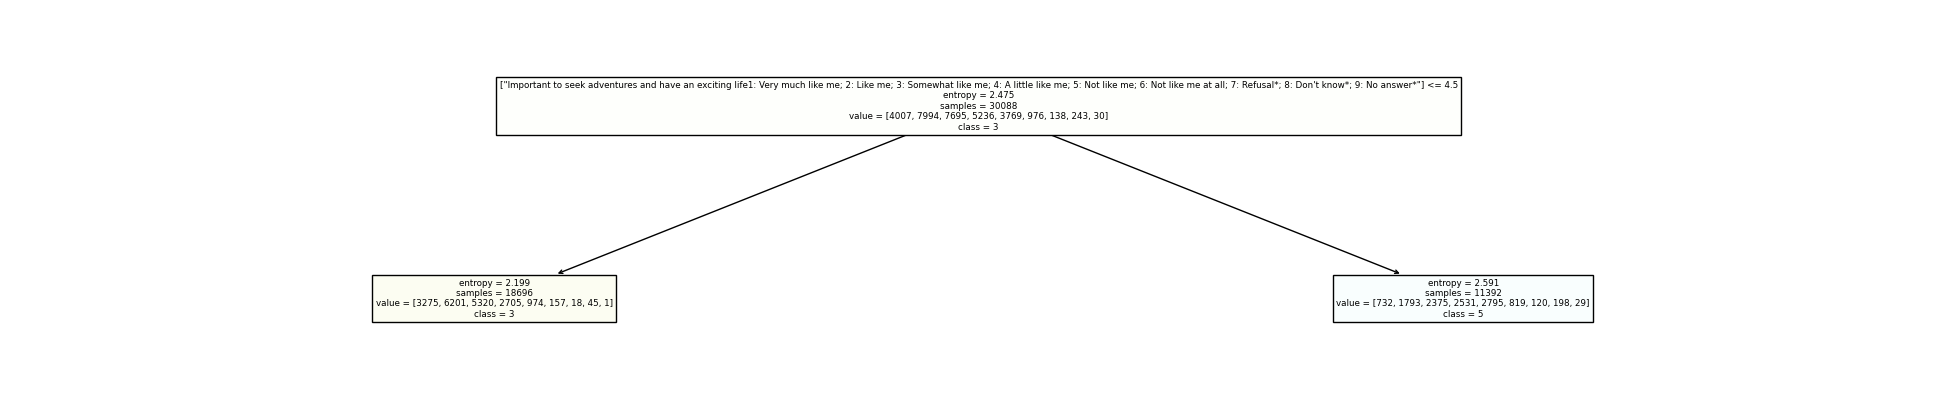

Accuracy is 0.29855110992954936
Important to do what is told and follow rules1: Very much like me; 2: Like me; 3: Somewhat like me; 4: A little like me; 5: Not like me; 6: Not like me at all; 7: Refusal*; 8: Don't know*; 9: No answer*


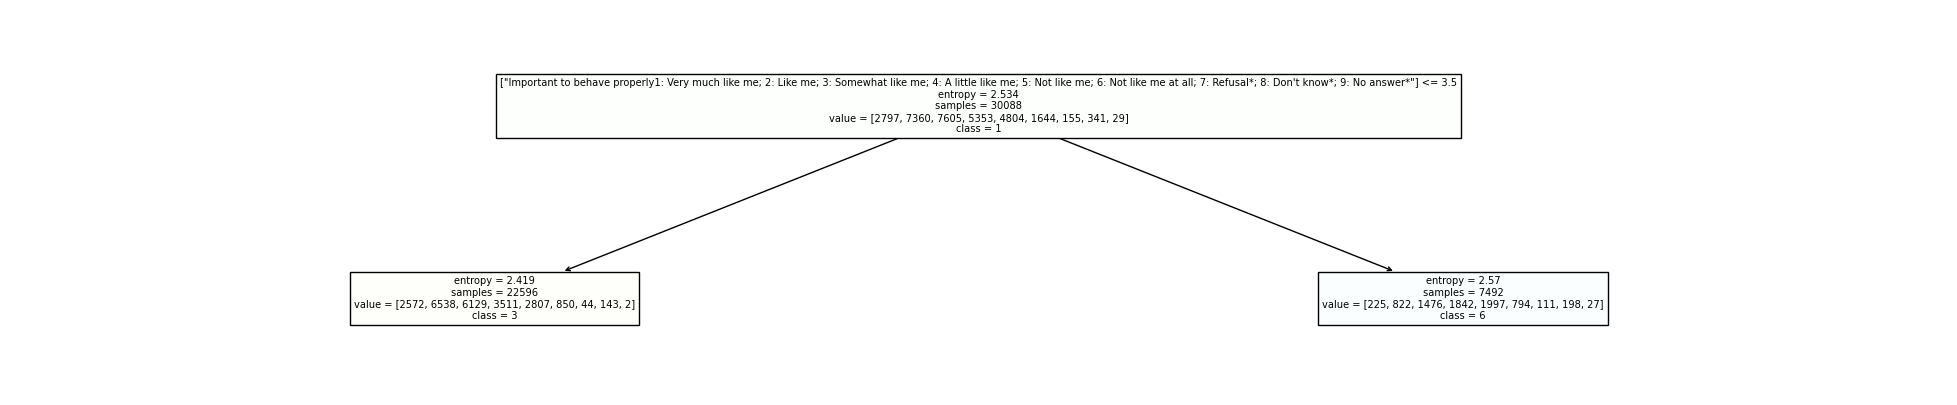

Accuracy is 0.2915060481191014
Important to seek adventures and have an exciting life1: Very much like me; 2: Like me; 3: Somewhat like me; 4: A little like me; 5: Not like me; 6: Not like me at all; 7: Refusal*; 8: Don't know*; 9: No answer*


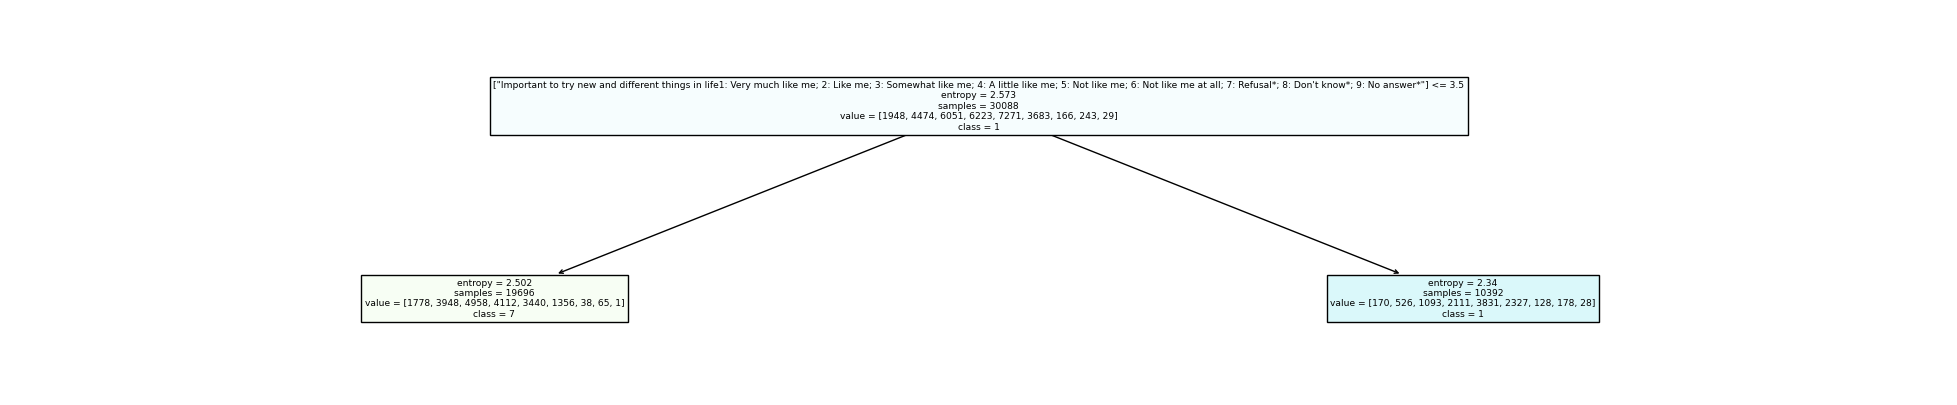

Accuracy is 0.29057556825734415
Important to be loyal to friends and devote to people close1: Very much like me; 2: Like me; 3: Somewhat like me; 4: A little like me; 5: Not like me; 6: Not like me at all; 7: Refusal*; 8: Don't know*; 9: No answer*


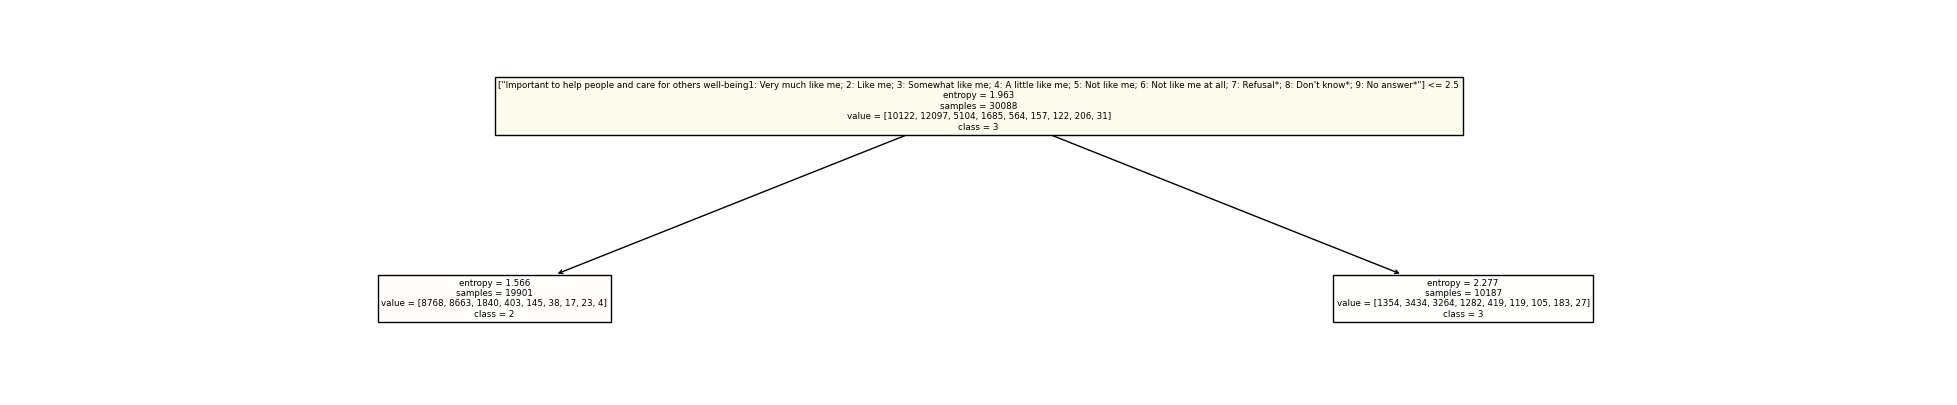

Accuracy is 0.40396118569719525
Important to seek fun and things that give pleasure1: Very much like me; 2: Like me; 3: Somewhat like me; 4: A little like me; 5: Not like me; 6: Not like me at all; 7: Refusal*; 8: Don't know*; 9: No answer*


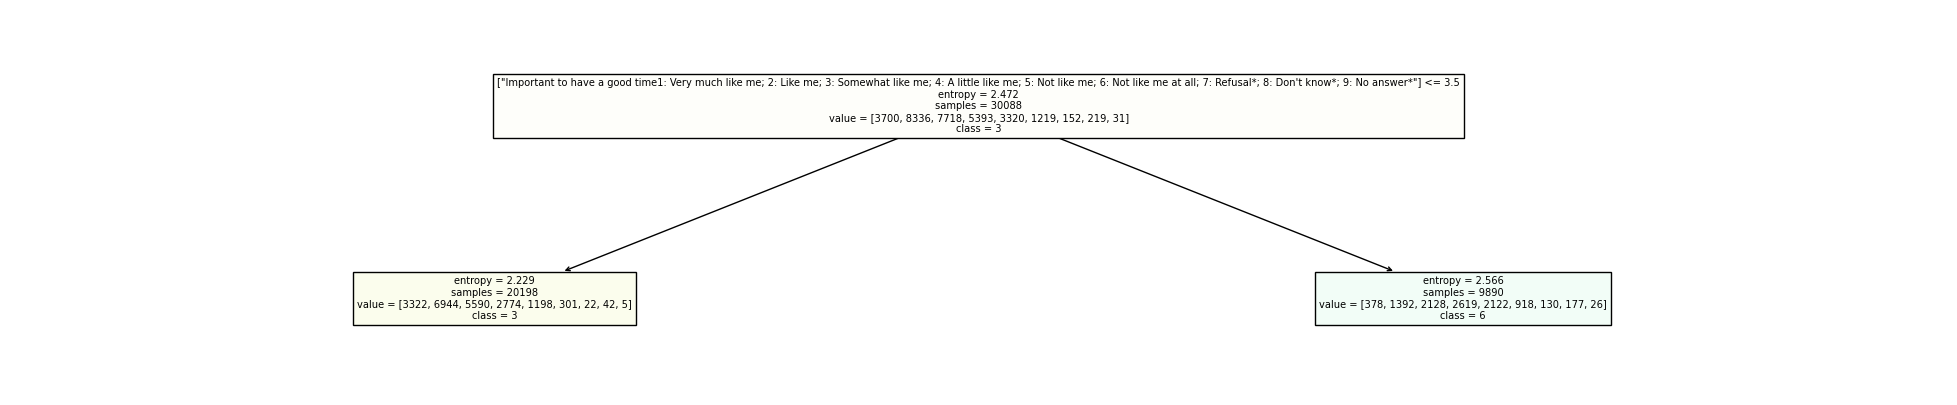

Accuracy is 0.32035092383357705
Groups of scientists manipulate, fabricate, or suppress evidence in order to deceive the public1: Agree strongly; 2: Agree; 3: Neither agree nor disagree; 4: Disagree; 5: Disagree strongly; 7: Refusal*; 8: Don't know*; 9: No answer*


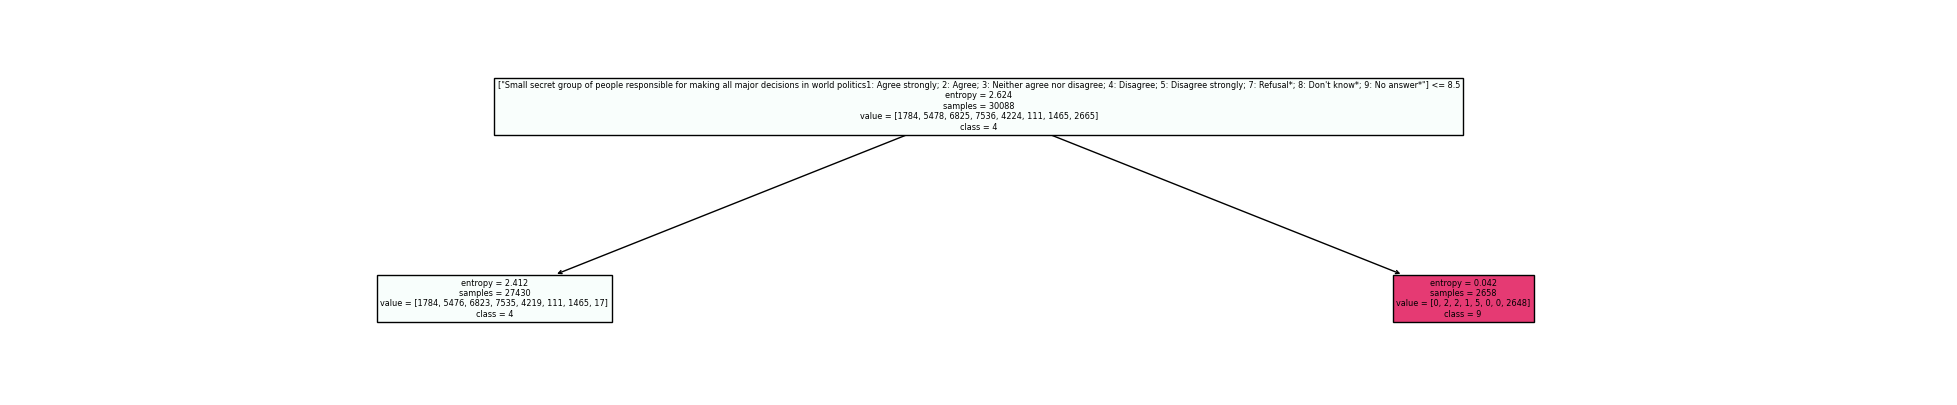

Accuracy is 0.33324471620364216
To what extent trust the government to deal with the impact of COVID-19 in country0: No trust at all; 1: 1; 2: 2; 3: 3; 4: 4; 5: 5; 6: 6; 7: 7; 8: 8; 9: 9; 10: Complete trust; 77: Refusal*; 88: Don't know*; 99: No answer*


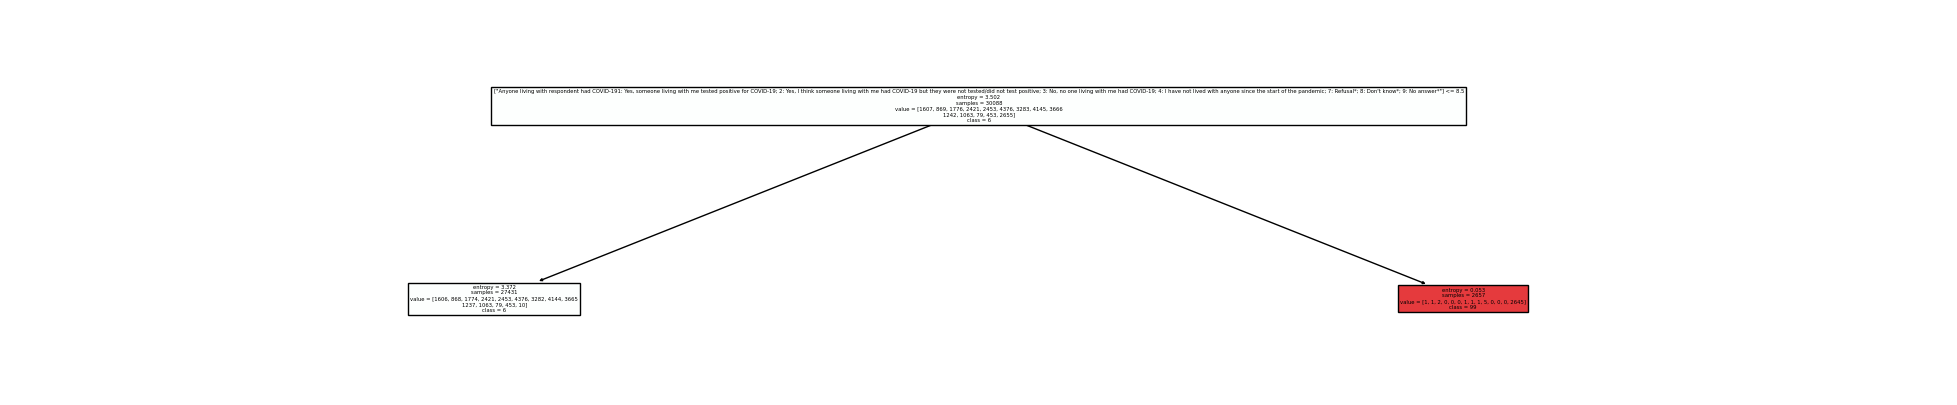

Accuracy is 0.23368337099561345
COVID-19 vaccine approved by national regulatory authority and available to the public in country1: Yes; 2: No; 9: Not available*


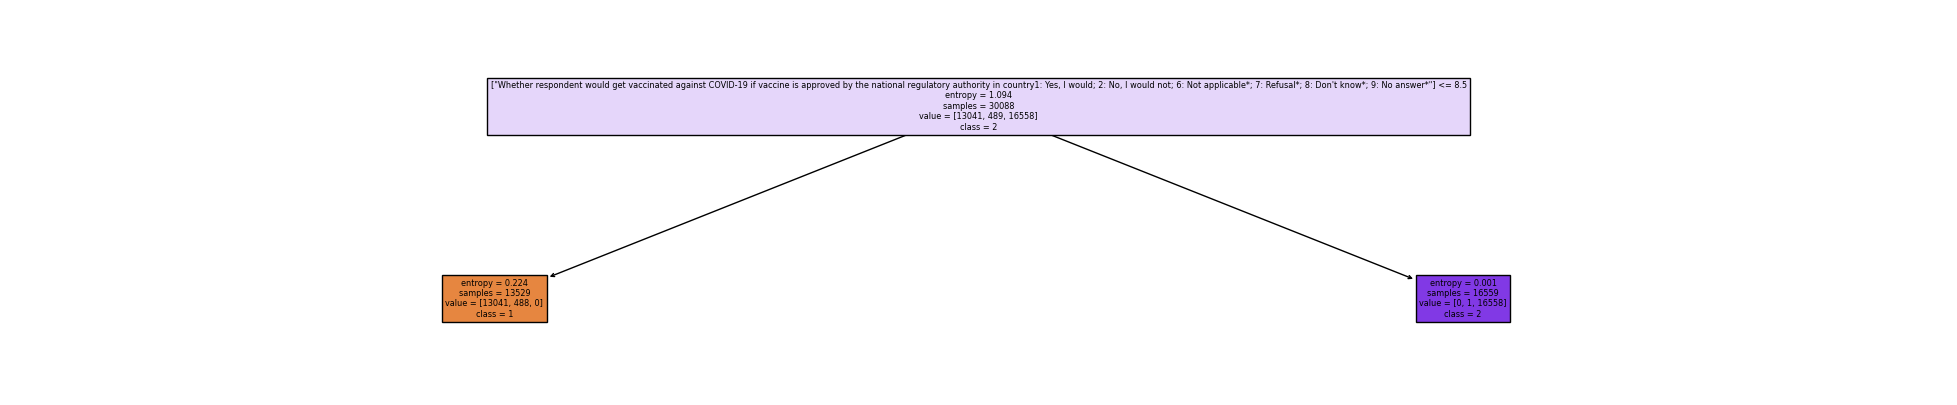

Accuracy is 0.984314768044663
Whether respondent will get vaccinated against COVID-19 with vaccine approved by the national regulatory authority in country1: Yes, I will; 2: Yes, I already have; 3: No; 6: Not applicable*; 7: Refusal*; 8: Don't know*; 9: No answer*


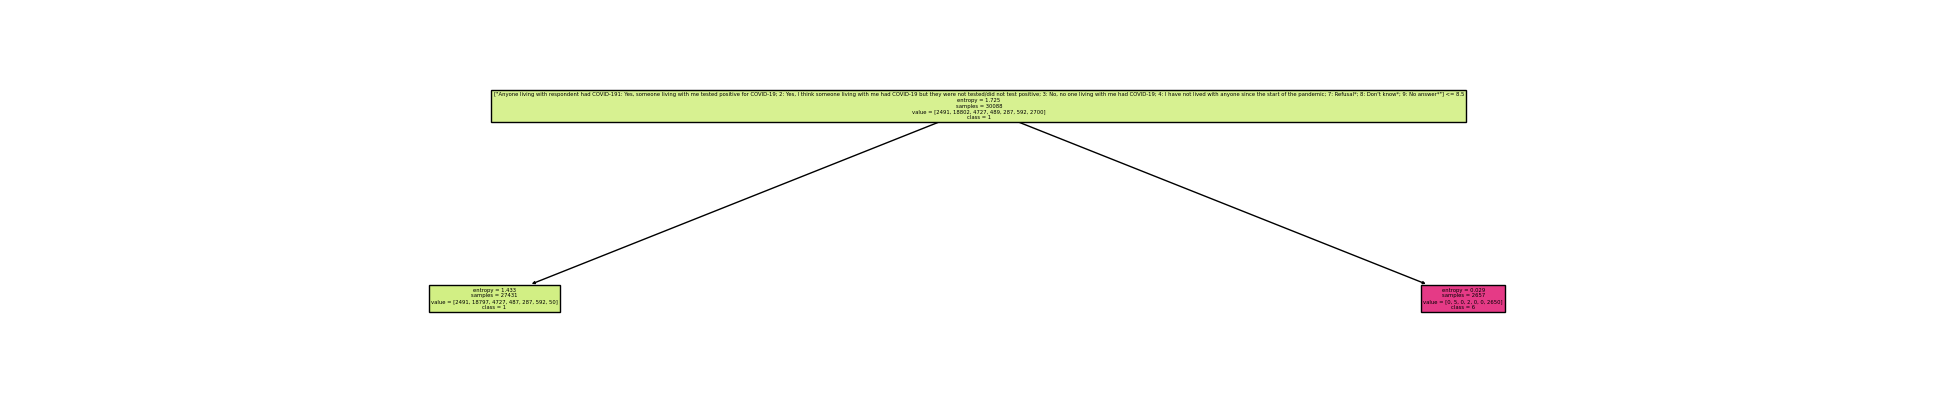

Accuracy is 0.70556958660109
Whether respondent would get vaccinated against COVID-19 if vaccine is approved by the national regulatory authority in country1: Yes, I would; 2: No, I would not; 6: Not applicable*; 7: Refusal*; 8: Don't know*; 9: No answer*


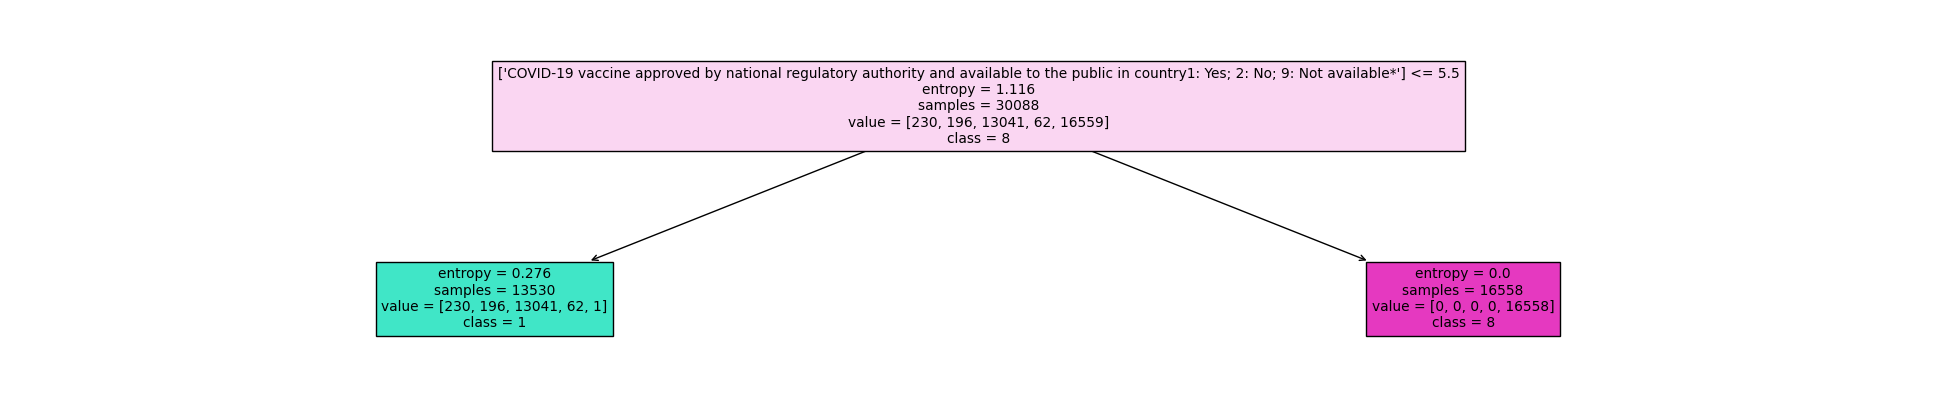

Accuracy is 0.984314768044663


In [165]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# { 
#     "alg": " HS512"
#     "typ": "JWT"
# }
numerical_answers = survey_questions.iloc[:,10:]

# Try converting each column to numeric and coerce errors to NaN
for column in survey_questions.columns:
    numerical_answers[column] = pd.to_numeric(survey_questions[column], errors='coerce')

# Drop columns that contain any NaN values (i.e., non-convertible columns)
numerical_answers = numerical_answers.dropna(axis=1, how='any')

for aim in Aims.index.values:
    if aim not in numerical_answers.columns: continue
    aimRow = str(ESSQuestionData_ADICO.loc[aim]['question_answers_combined'])
    print(aimRow)
    class_names = ESSQuestionData_ADICO['responseoptions']
    feat_names = numerical_answers.loc[:, ~numerical_answers.columns.isin([aim])].columns
    feature_descs = [ESSQuestionData_ADICO[ESSQuestionData_ADICO.index == feature]['question_answers_combined'].values for feature in feat_names if feature in list(ESSQuestionData_ADICO.index)]

    X = numerical_answers.loc[:, ~numerical_answers.columns.isin([aim])].values
    Y = numerical_answers.loc[:, aim].values

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
    clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=1, min_samples_leaf=20)
    clf_entropy.fit(X_train,y_train)
    # Visualize the decision tree
    plt.figure(figsize=(25,5))
    plot_tree(clf_entropy, filled=True, feature_names=feature_descs, class_names = [str(item) for item in survey_questions[aim].unique()])
    plt.show()
    y_pred_en = clf_entropy.predict(X_test)
    print(("Accuracy is"),accuracy_score(y_test, y_pred_en))

In [157]:
survey_questions.loc[:, 'prtclbhr'].values

array([nan, nan, nan, ..., nan, nan, nan])